In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold,StratifiedKFold
from sklearn import neighbors, datasets, preprocessing, metrics,tree
from sklearn.preprocessing import binarize, label_binarize
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
import itertools
from itertools import cycle
from functools import reduce
from pandas import DataFrame
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', 310)


# Functions

In [2]:

# def run_model(name,model_ran, X, y, y_test,  y_prediction_of_a_model):
#     print(f'{name} prediction accuracy is {accuracy_score(y_test, y_prediction_of_a_model)}
    
# evaluate the models
def run_model(name,model_ran, X, y, y_test,  y_prediction_of_a_model):
    accuracy = accuracy_score(y_test, y_prediction_of_a_model)
    cross_val = cross_val_score(model_ran, X,y, cv=10).mean()
    precision = precision_score(y_test, y_prediction_of_a_model, average='weighted')
    recall = recall_score(y_test, y_prediction_of_a_model, average = 'weighted')
    f1 = f1_score(y_test, y_prediction_of_a_model, average='weighted')
    
    return [name,
            accuracy_score(y_test, y_prediction_of_a_model),
            cross_val_score(model_ran, X,y, cv=10).mean(),
            precision_score(y_test, y_prediction_of_a_model, average='weighted'),
            recall_score(y_test, y_prediction_of_a_model, average = 'weighted'),
            f1_score(y_test, y_prediction_of_a_model, average='weighted')]
    
#     f'{name}_evalutions' = [model_ran, accuracyS
    



In [3]:
    
def print_model(name,model_ran, X, y, y_test,  y_prediction_of_a_model):
    accuracy = accuracy_score(y_test, y_prediction_of_a_model)
    cross_val = cross_val_score(model_ran, X,y, cv=10).mean()
    precision = precision_score(y_test, y_prediction_of_a_model, average='weighted')
    recall = recall_score(y_test, y_prediction_of_a_model, average = 'weighted')
    f1 = f1_score(y_test, y_prediction_of_a_model, average='weighted')
    print(f'{name} Prediction accuracy is: {accuracy}\n {name} Mean cross validation is: {cross_val}\n  {name} Precision score is: {precision}\n   {name} Prediction recall score is: {recall}\n    {name} Prediction f1 score is: {f1}')



In [4]:
#for roc auc score
def classify_binary(y, classes):
    y2_binary= label_binarize(y,  classes=[1,2,3])
    n_classes = y.shape[1]
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state=3)


In [5]:
    
def print_model_roc(name,model_ran, X, y, y_test,  y_prediction_of_a_model):
    accuracy = accuracy_score(y_test, y_prediction_of_a_model)
    cross_val = cross_val_score(model_ran, X,y, cv=10).mean()
    precision = precision_score(y_test, y_prediction_of_a_model, average='weighted')
    recall = recall_score(y_test, y_prediction_of_a_model, average = 'weighted')
    f1 = f1_score(y_test, y_prediction_of_a_model, average='weighted')
    roc = roc_auc_score(y_test, y_prediction_of_a_model, average='weighted')
    
    
    print(f'{name} Prediction accuracy is: {accuracy}\n {name} Mean cross validation is: {cross_val}\n  {name} Precision score is: {precision}\n   {name} Prediction recall score is: {recall}\n    {name} Prediction f1 score is: {f1}\n      {name} Prediction roc score is: {roc}')
          
          
          
          


In [6]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Data import from made CSV files

In [8]:
data_le = pd.read_csv("data_le.csv")
data_le_dummy = pd.read_csv('data_le_dummy.csv')
data_original = pd.read_csv('data_original.csv')



In [9]:
data_le.describe(include = 'O').transpose()


,count,unique,top,freq
Name,4278,4278,Sega Soccer Slam,1
Genre,4278,12,Action,839
Publisher,4278,247,Electronic Arts,386
Developer,4278,1185,Capcom,95
Rating,4278,5,T,1564
Platform,4278,417,PS2,597


# Correlation

In [10]:

data_le_predictors = data_le.iloc[:,1:-1]
corr= data_le_predictors.corr()
corr

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,User_Count
Year_of_Release,1.000000,-0.000929,0.029022,-0.012915,0.036190,0.012059,-0.044566,-0.225902,0.174217
NA_Sales,-0.000929,1.000000,0.881290,0.517311,0.737245,0.963359,0.213622,0.086635,0.238617
EU_Sales,0.029022,0.881290,1.000000,0.581375,0.698873,0.950841,0.188398,0.067766,0.239488
JP_Sales,-0.012915,0.517311,0.581375,1.000000,0.423651,0.663599,0.181035,0.143138,0.082902
Other_Sales,0.036190,0.737245,0.698873,0.423651,1.000000,0.794199,0.168064,0.063834,0.217674
Global_Sales,0.012059,0.963359,0.950841,0.663599,0.794199,1.000000,0.218513,0.096269,0.238679
Critic_Score,-0.044566,0.213622,0.188398,0.181035,0.168064,0.218513,1.000000,0.626585,0.266341
User_Score,-0.225902,0.086635,0.067766,0.143138,0.063834,0.096269,0.626585,1.000000,0.041395
User_Count,0.174217,0.238617,0.239488,0.082902,0.217674,0.238679,0.266341,0.041395,1.000000


In [11]:
corr.describe(include="all")

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,User_Count
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.107464,0.515239,0.515228,0.397788,0.459970,0.548613,0.313110,0.211080,0.277701
std,0.350339,0.393178,0.389925,0.328183,0.356904,0.404447,0.310863,0.369170,0.281615
min,-0.225902,-0.000929,0.029022,-0.012915,0.036190,0.012059,-0.044566,-0.225902,0.041395
25%,-0.012915,0.213622,0.188398,0.143138,0.168064,0.218513,0.181035,0.063834,0.174217
50%,0.012059,0.517311,0.581375,0.423651,0.423651,0.663599,0.213622,0.086635,0.238617
75%,0.036190,0.881290,0.881290,0.581375,0.737245,0.950841,0.266341,0.143138,0.239488
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


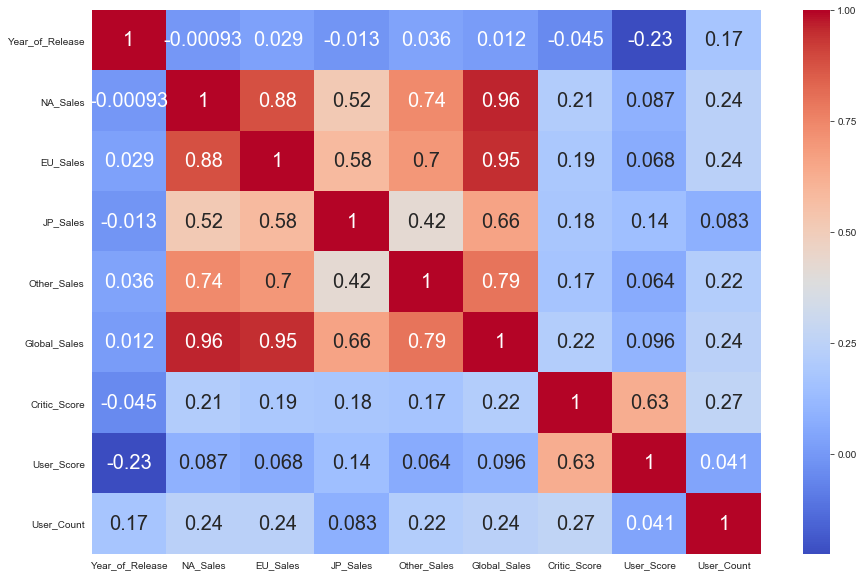

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, annot_kws ={'size':20}, cmap='coolwarm')


## OLM

### OLM for Global_Sales~NA_Sales

In [13]:
abs(corr).sort_values(by = 'Global_Sales',  ascending= False)['Global_Sales']
data_reg_simple = ols(formula= "Global_Sales~NA_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 5.516e+04
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:48:44   Log-Likelihood:                -3978.4
No. Observations:                4278   AIC:                             7961.
Df Residuals:                    4276   BIC:                             7974.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0097      0.010      0.976      0.329      -0.010       0.029
NA_Sales       1.9827      0.008    234.868      0.000       1.966       1.999
==============================================================================
Omnibus:                     4080.392   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           886730.597
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      73.077   Cond. No.                         1.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLM for Global_Sales~EU_Sales

In [14]:
abs(corr).sort_values(by = 'Global_Sales',  ascending= False)['Global_Sales']
data_reg_simple = ols(formula= "Global_Sales~EU_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 4.031e+04
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:48:44   Log-Likelihood:                -4593.4
No. Observations:                4278   AIC:                             9191.
Df Residuals:                    4276   BIC:                             9203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1504      0.011     13.310      0.000       0.128       0.173
EU_Sales       2.8237      0.014    200.778      0.000       2.796       2.851
==============================================================================
Omnibus:                     5415.459   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6320792.361
Skew:                           6.116   Prob(JB):                         0.00
Kurtosis:                     190.911   Cond. No.                         1.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLM for NA_Sales~EU_Sales

In [15]:
abs(corr).sort_values(by = 'NA_Sales',  ascending= False)['NA_Sales']
data_reg_simple = ols(formula= "NA_Sales~EU_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                 1.487e+04
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:48:44   Log-Likelihood:                -3313.7
No. Observations:                4278   AIC:                             6631.
Df Residuals:                    4276   BIC:                             6644.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1058      0.008     12.636      0.000       0.089       0.122
EU_Sales       1.2716      0.010    121.946      0.000       1.251       1.292
==============================================================================
Omnibus:                     2877.232   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1116149.763
Skew:                           1.998   Prob(JB):                         0.00
Kurtosis:                      82.030   Cond. No.                         1.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLM for Critic_Score~User_Score

In [16]:
abs(corr).sort_values(by = 'Critic_Score',  ascending= False)['Critic_Score']
data_reg_simple = ols(formula= "Critic_Score~User_Score", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     2764.
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:48:44   Log-Likelihood:                -16351.
No. Observations:                4278   AIC:                         3.271e+04
Df Residuals:                    4276   BIC:                         3.272e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.6154      0.871     28.269      0.000      22.908      26.323
User_Score     0.6171      0.012     52.573      0.000       0.594       0.640
==============================================================================
Omnibus:                       91.454   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.254
Skew:                          -0.308   Prob(JB):                     8.46e-24
Kurtosis:                       3.464   Cond. No.                         382.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking the relationships between the different categories

Visualizing relationship with each column of my dataset

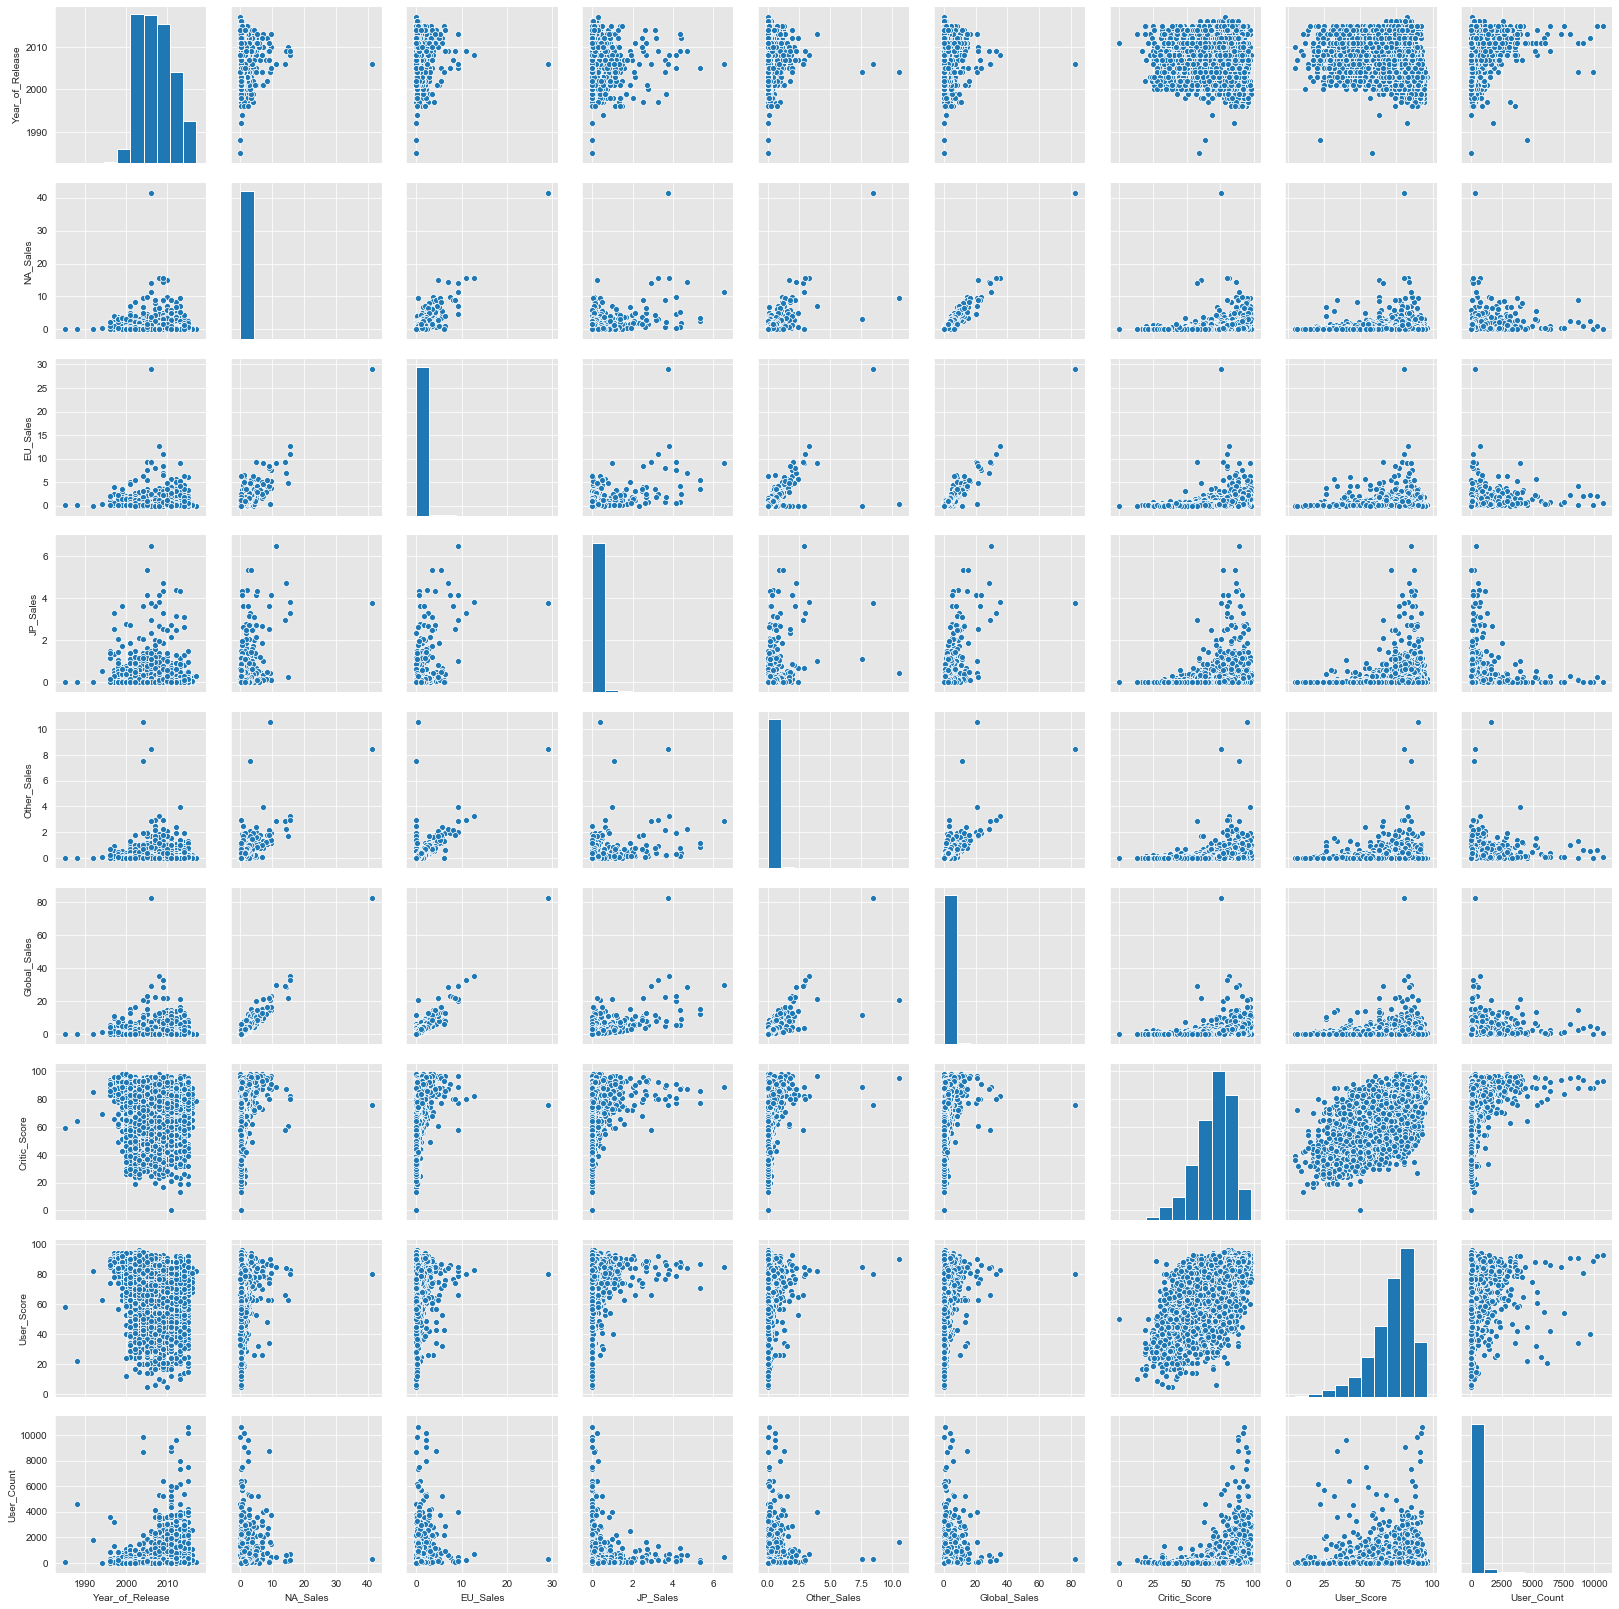

In [17]:
sns.pairplot(data_original, kind='scatter', dropna=True)

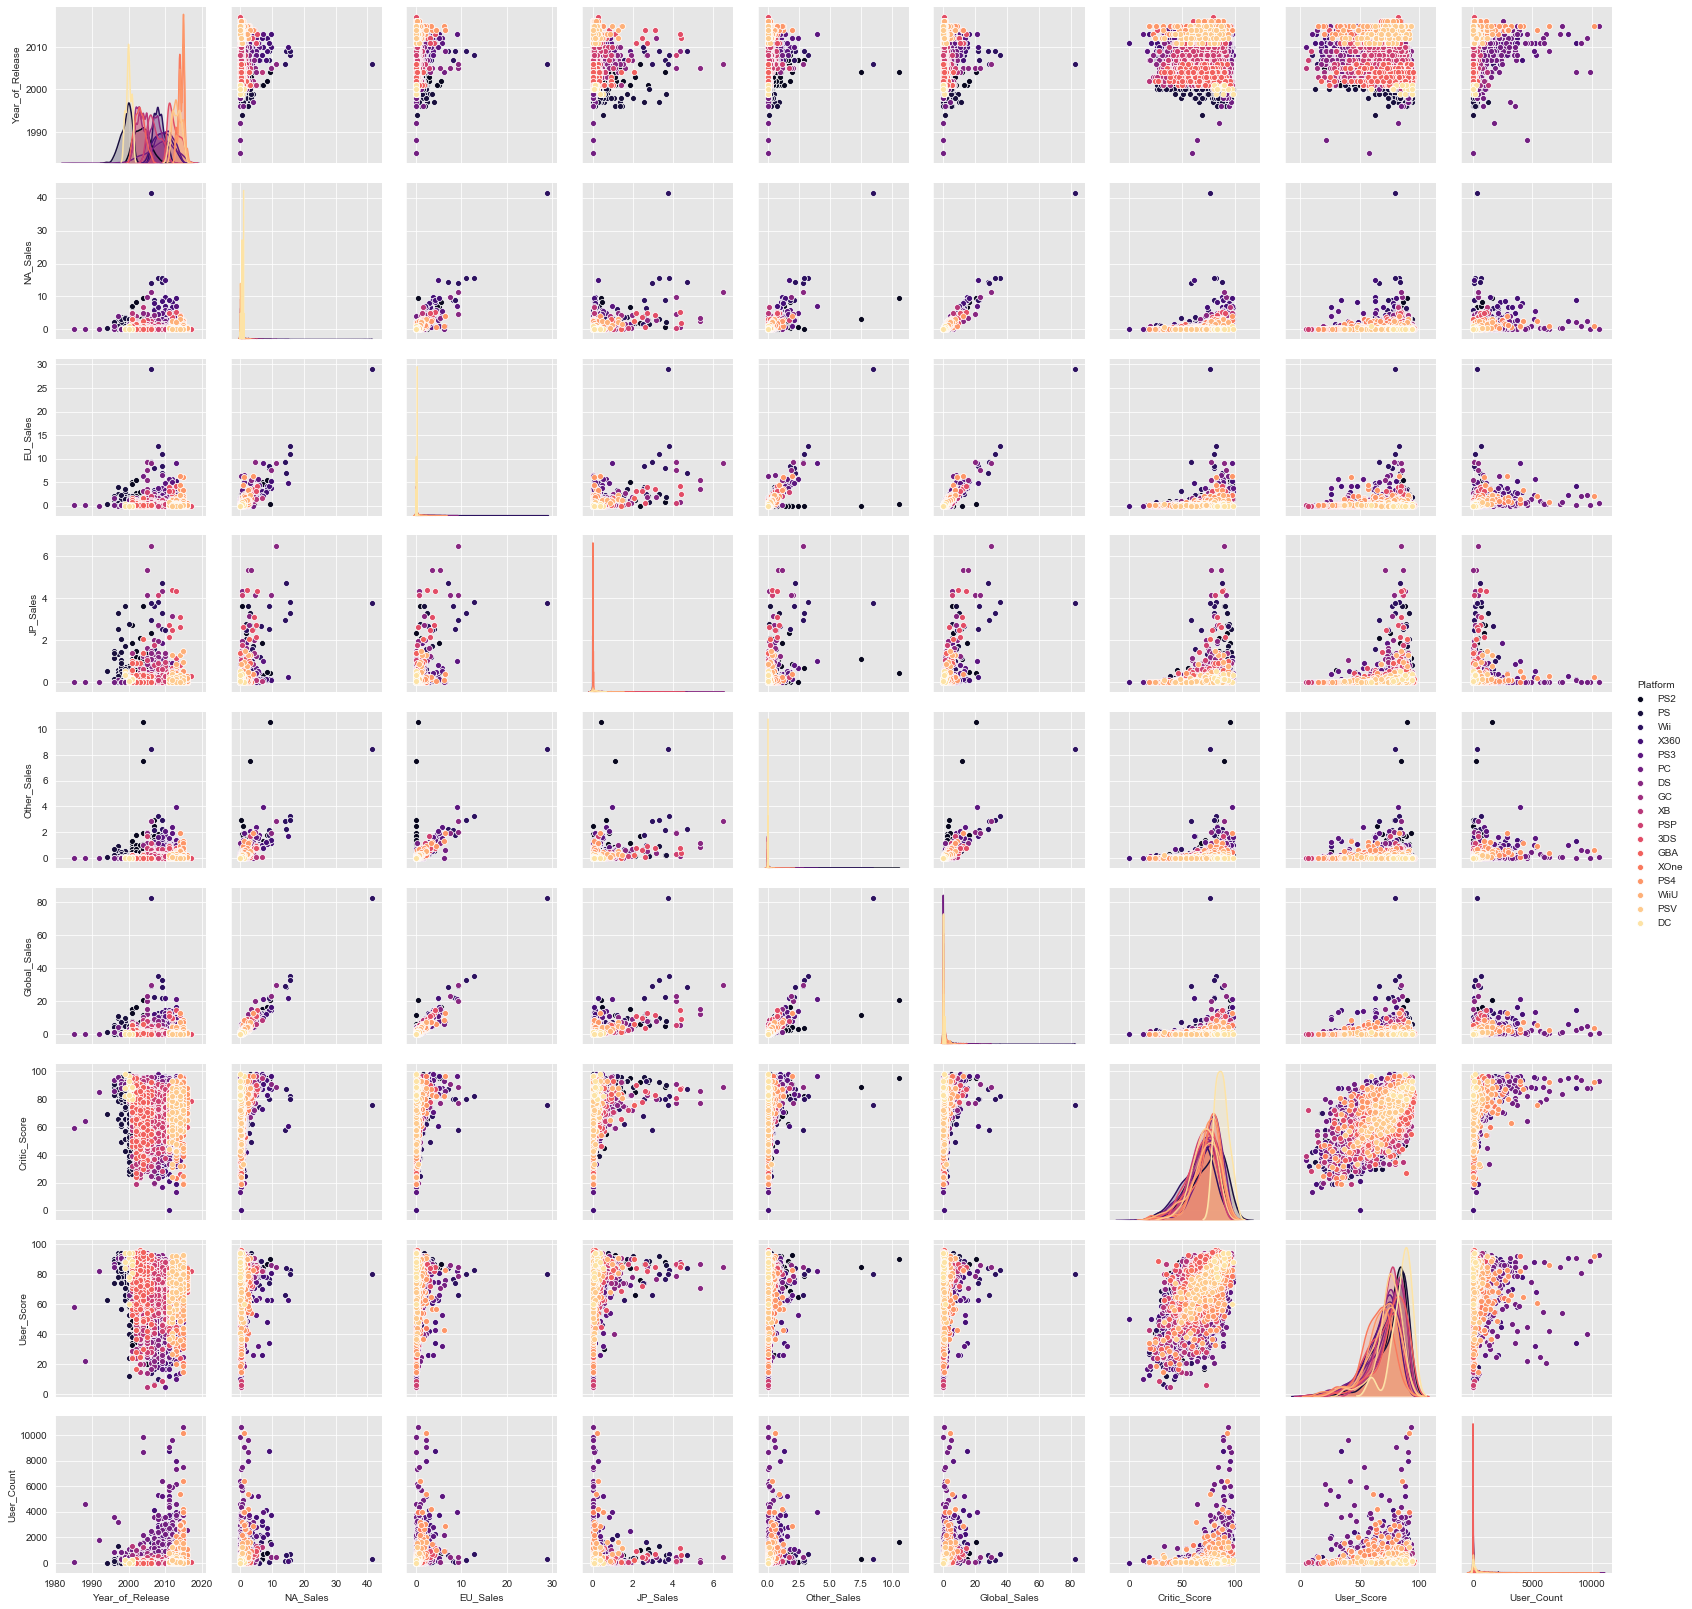

In [18]:
sns.pairplot(data_original, hue ='Platform', palette ='magma')

//anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



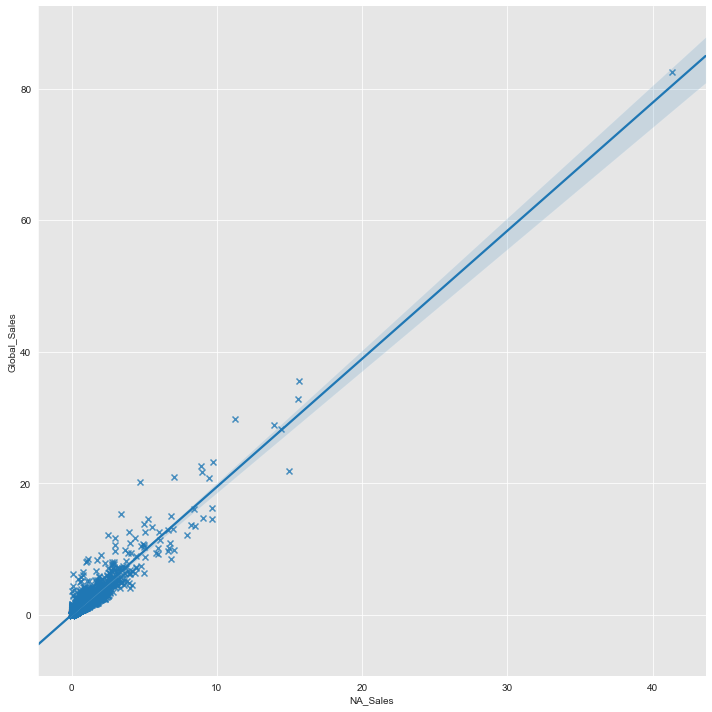

In [19]:

sns.lmplot(x='NA_Sales', y='Global_Sales', data= data_original, markers=[ "x"], fit_reg =True,size = 10)


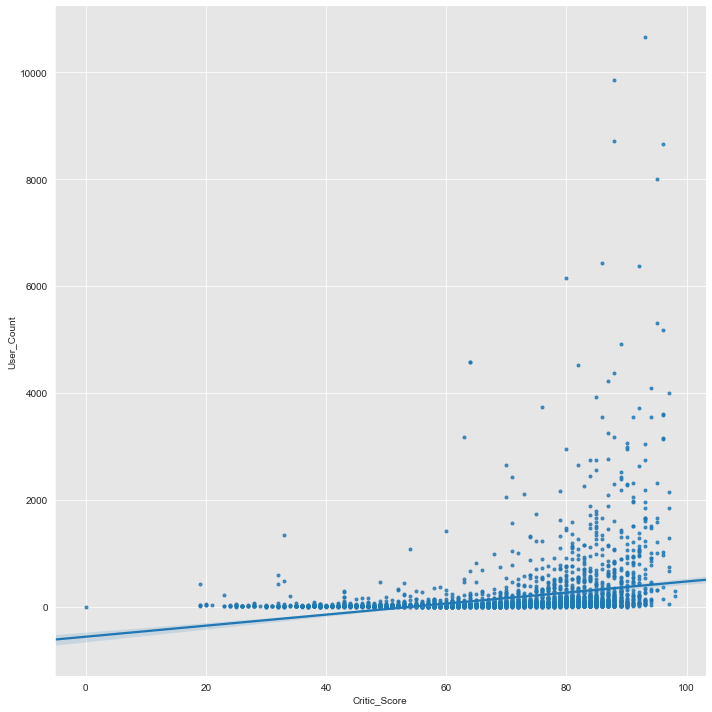

In [20]:
sns.lmplot(x='Critic_Score', y='User_Count', data= data_le, markers=["."], fit_reg =True,size = 10)

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



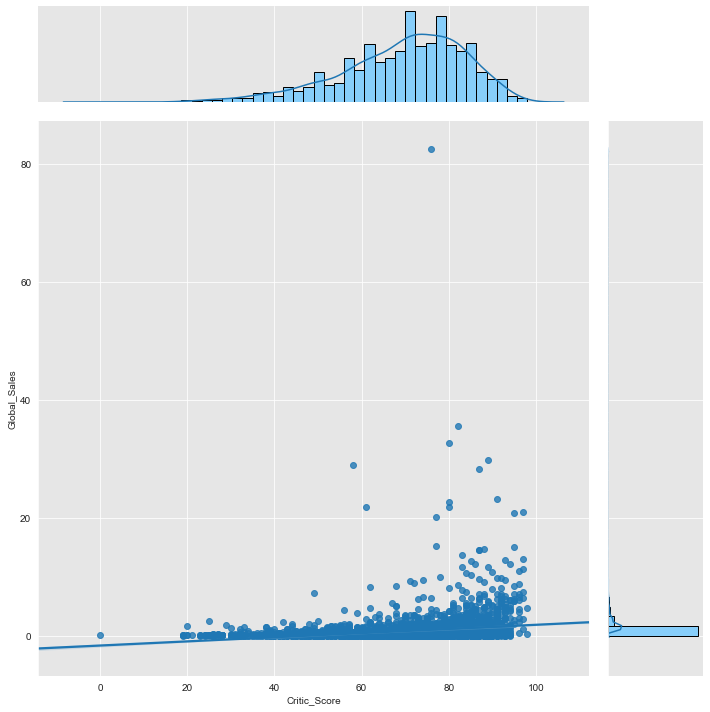

In [21]:
sns.jointplot(x="Critic_Score", y="Global_Sales", data=data_le, kind="reg", 
                  size=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}})

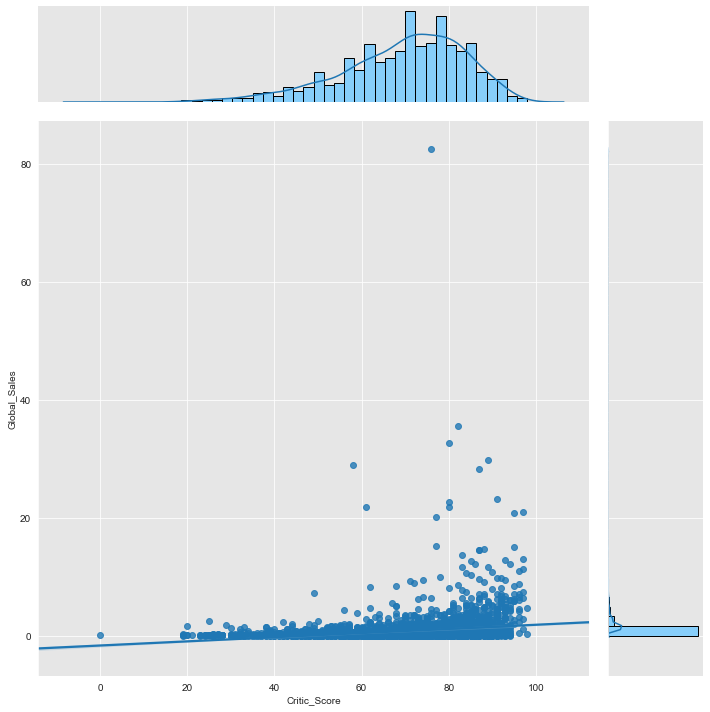

In [22]:
sns.jointplot(x="Critic_Score", y="Global_Sales", data=data_le, kind="reg", 
                  size=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}})

Box plot of the relationship for type against rank and score

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

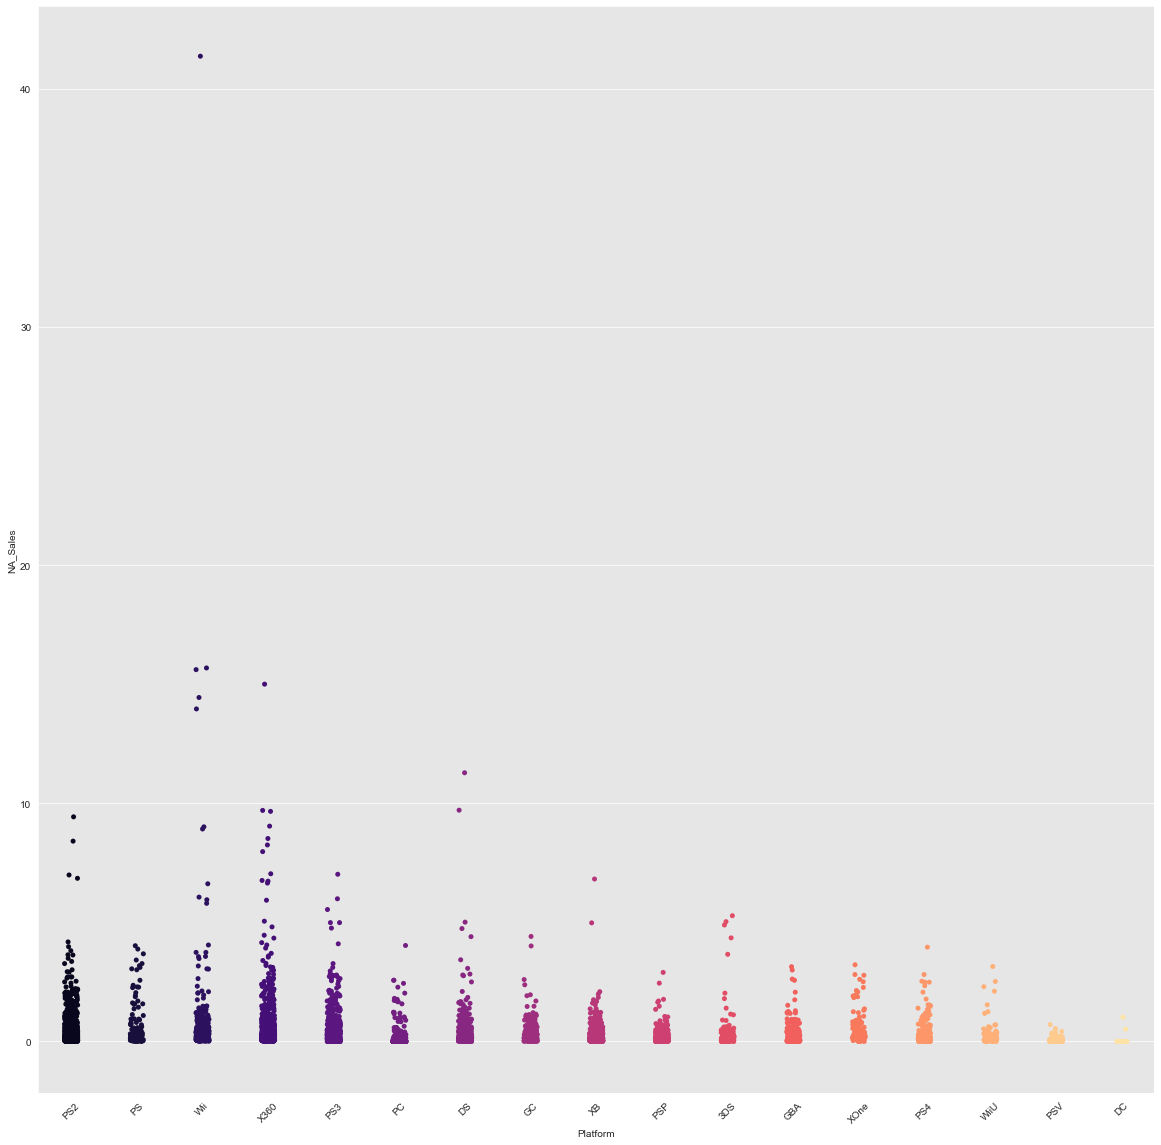

In [23]:
fig, ax = plt.subplots(figsize=(20,20))
sns.stripplot(data=data_original, x='Platform',y= 'NA_Sales' , orient='v', palette ='magma')
# plt.gca().invert_yaxis()
plt.ylim()
plt.xticks(rotation=45)

(0, 17.5)

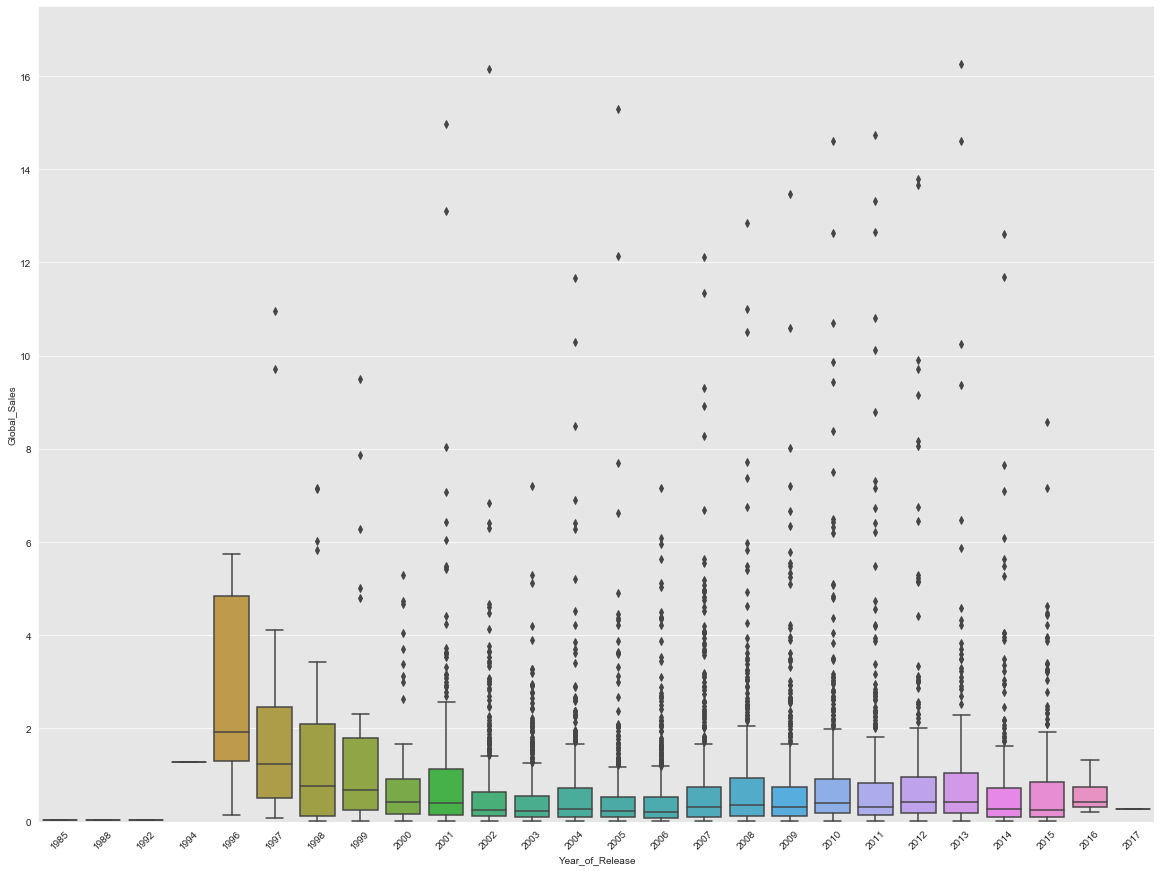

In [24]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=data_original, x='Year_of_Release' ,y= 'Global_Sales', orient='v', )
plt.xticks(rotation=45)
# had to limit y axis the graph was very small (one outlier on 2006 @ 8.2 million not shown)
plt.ylim(0,17.5) 

Swarmplot of the relationship between the source and score with the different colors showing the rating (where 0 is all ages and brown is R+)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

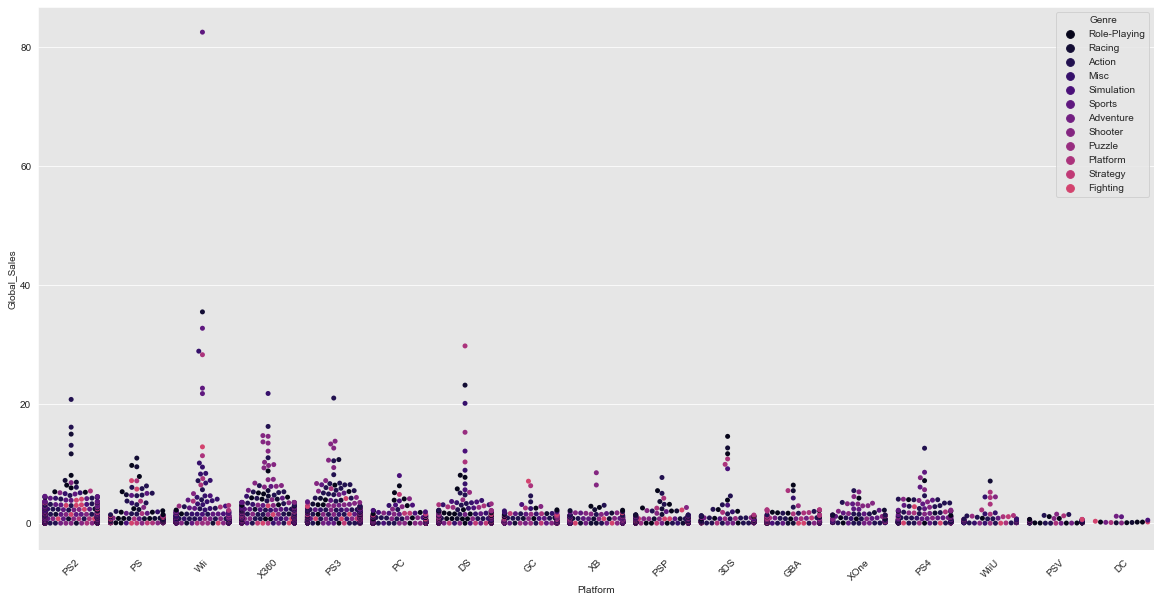

In [25]:
sns.set_palette("magma", 20)
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_original, x='Platform', y= 'Global_Sales', size=5, hue='Genre',cmap='ReW')
plt.xticks(rotation =45)


([<matplotlib.axis.XTick at 0x1c28eecb38>,
 <a list of 2 Text xticklabel objects>)

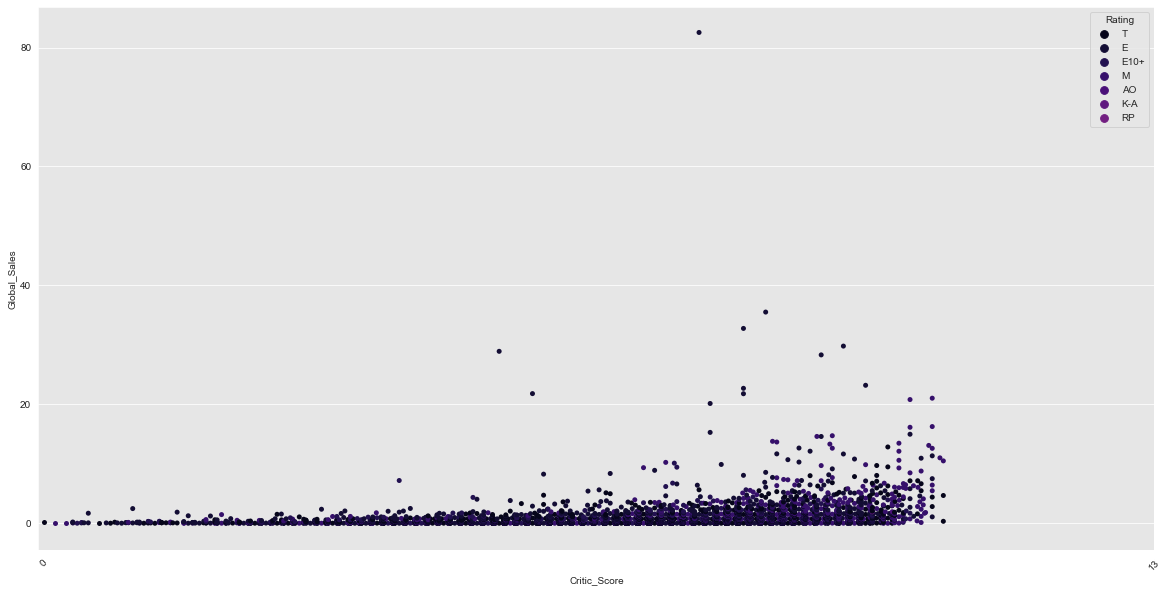

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_original, x='Critic_Score', y= 'Global_Sales', size=5, hue='Rating', cmap='reds' )
plt.xticks((0,100),rotation =45)


In [53]:
data_le_nums = pd.read_csv("data_le_nums.csv")

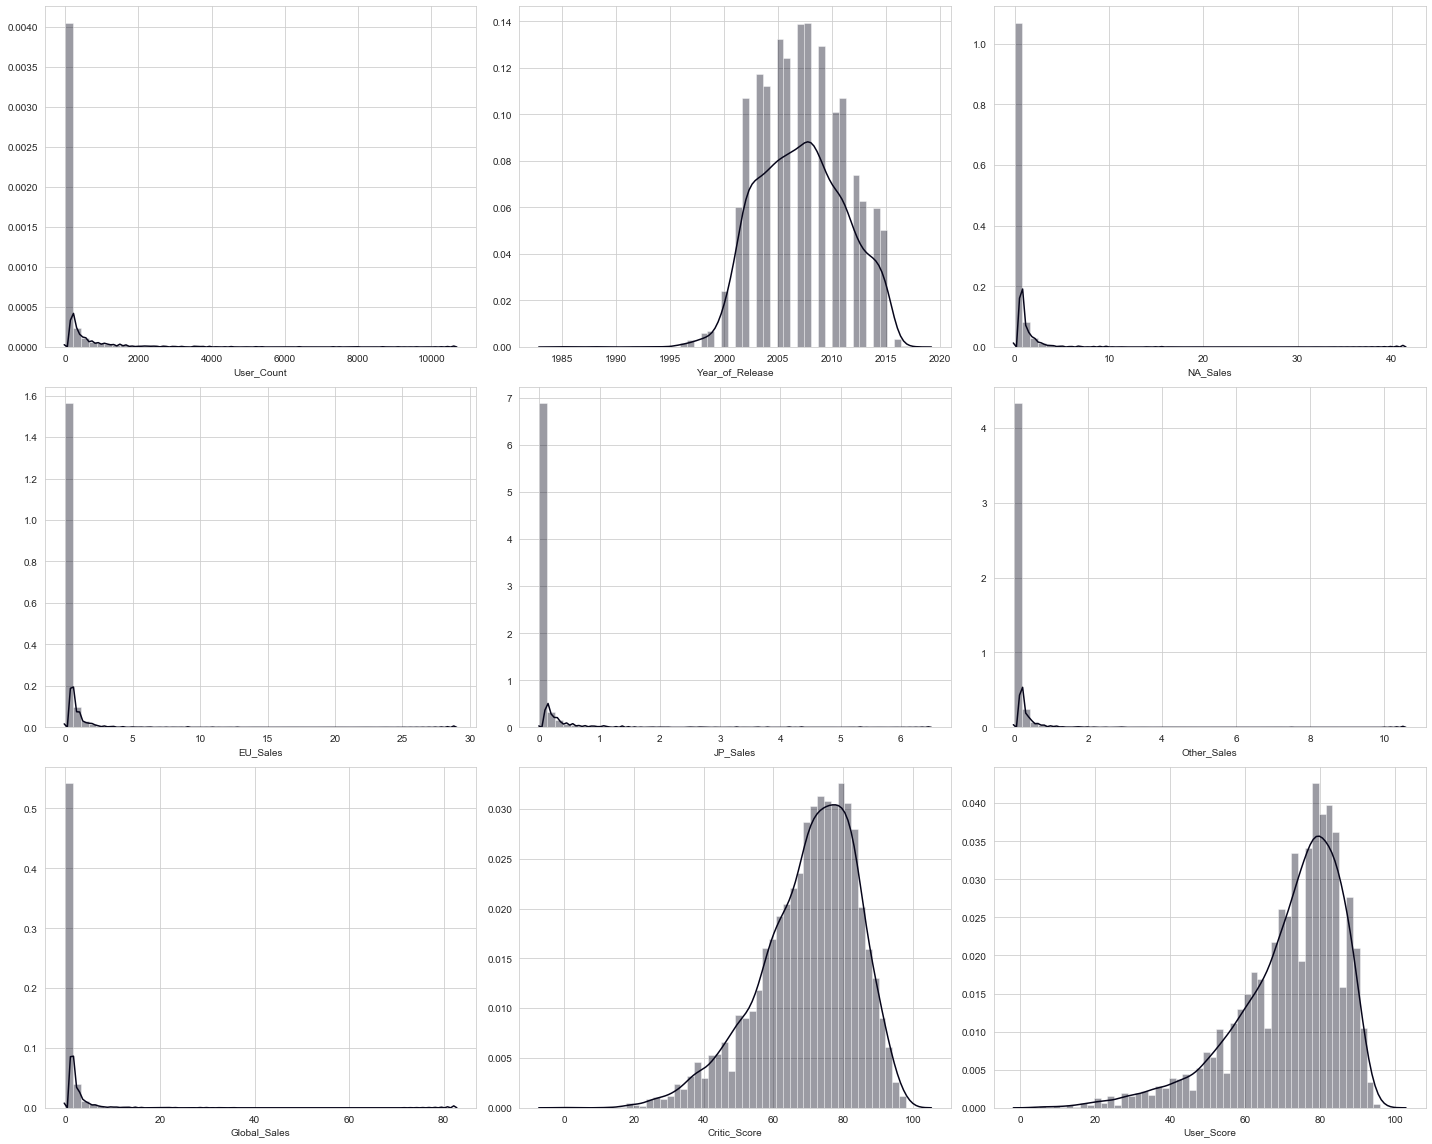

In [54]:
rows = 3
cols = 3
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = data_le_nums.columns
index = -1
for i in range(rows):
    for j in range(cols):
        sns.distplot(data_le_nums[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

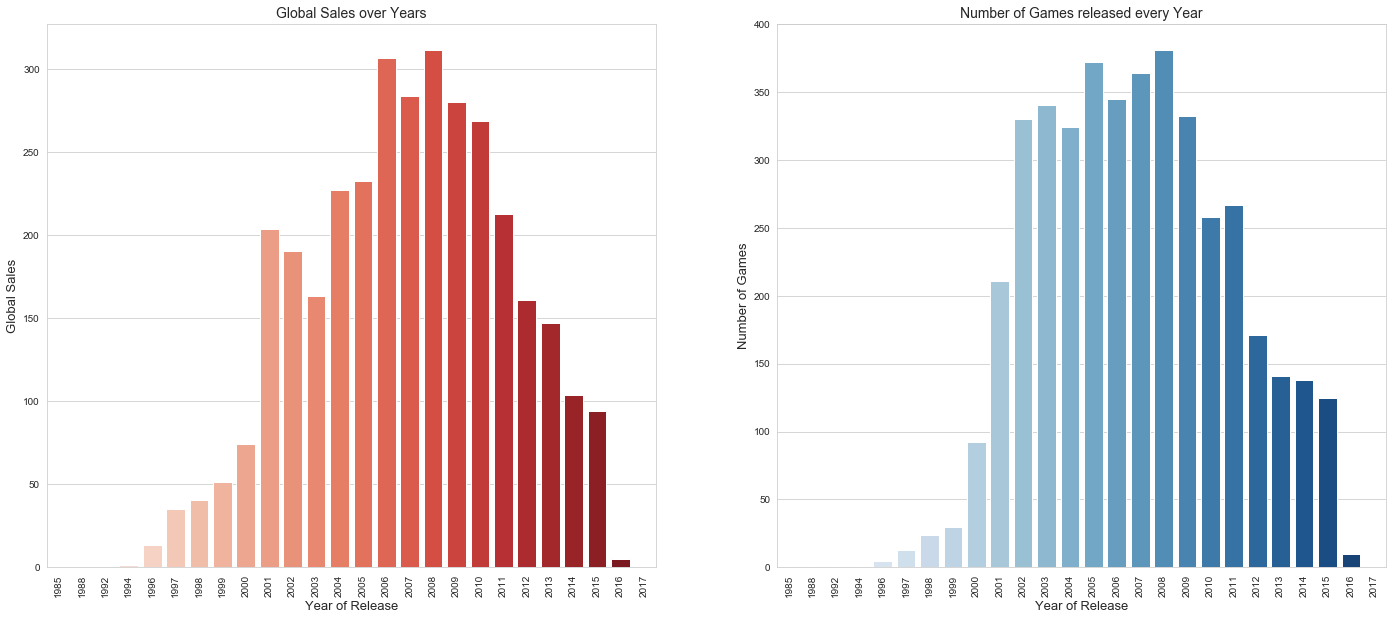

In [55]:
fig=plt.figure(figsize=(24,10))
plt.subplots_adjust(left=None, wspace=None, hspace=None)
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
plt.title('Global Sales over Years',fontdict={'fontsize':14})
plt.xticks(rotation=90)
sns.barplot(x='Year_of_Release',y='Global_Sales',data=data_le.groupby(data_le['Year_of_Release'].sort_values()).sum().Global_Sales.reset_index(),palette='Reds')
plt.ylabel('Global Sales',fontdict={'fontsize':13})
plt.xlabel('Year of Release',fontdict={'fontsize':13})

plt.subplot(1, 2, 2)
plt.title('Number of Games released every Year',fontdict={'fontsize':14})
plt.xticks(rotation=90)
sns.barplot(x=data_le.Year_of_Release.value_counts().index, y=data_le.Year_of_Release.value_counts(),palette='Blues');
plt.ylabel('Number of Games',fontdict={'fontsize':13})
plt.xlabel('Year of Release',fontdict={'fontsize':13});

# Avg Sales against Consoles

In [56]:
NA_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['NA_Sales'],
                mode='lines+markers',
                name='North America Sales',
                marker = dict(size=5),
                line=dict(color = 'blue',width=2))
EU_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['EU_Sales'],
                mode='lines+markers',
                name='Europe Sales',
                marker = dict(size=5),
                line=dict(color = 'purple',width=2))

JP_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['JP_Sales'],
                mode='lines+markers',
                name='Japan Sales',
                marker = dict(size=5),
                line=dict(color = 'orange',width=2))

Other_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['Other_Sales'],
                mode='lines+markers',
                name='Other Country Sales',
                marker = dict(size=5),
                line=dict(color = 'magenta',width=2))

Global_plot=go.Scatter(
                x=data_original.groupby(['Platform']).mean().reset_index()['Platform'], 
                y=data_original.groupby(['Platform']).mean().reset_index()['Global_Sales'],
                mode='lines+markers',
                name='Worldwide Sales',
                marker = dict(size=5),
                line=dict(color = 'teal',width=2))

edit_data_le=[NA_plot,EU_plot,JP_plot,Other_plot,Global_plot]
layout=dict(
            legend=dict(x=0.77, y=1.4, font=dict(size=10)), legend_orientation="v",
            plot_bgcolor='light grey',
            xaxis=dict(title="Platform",tickfont=dict(size=8.35),zeroline=False,gridcolor="white"),
            yaxis=dict(title='Avg Sales (in Millions)',gridcolor="#DCDCDC"),
            title="Avg Sales from Different Markets and Consoles")


fig=dict(data=edit_data_le,layout=layout)
iplot(fig)


# Avg Sales against Genres

In [57]:
NA_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['NA_Sales'],
                mode='lines+markers',
                name='North America Sales',
                marker = dict(size=5),
                line=dict(color = 'blue',width=2))
EU_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['EU_Sales'],
                mode='lines+markers',
                name='Europe Sales',
                marker = dict(size=5),
                line=dict(color = 'purple',width=2))

JP_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['JP_Sales'],
                mode='lines+markers',
                name='Japan Sales',
                marker = dict(size=5),
                line=dict(color = 'orange',width=2))

Other_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['Other_Sales'],
                mode='lines+markers',
                name='Other Country Sales',
                marker = dict(size=5),
                line=dict(color = 'magenta',width=2))

Global_plot=go.Scatter(
                x=data_le.groupby(['Genre']).mean().reset_index()['Genre'], 
                y=data_le.groupby(['Genre']).mean().reset_index()['Global_Sales'],
                mode='lines+markers',
                name='Worldwide Sales',
                marker = dict(size=5),
                line=dict(color = 'teal',width=2))

edit_data_le=[NA_plot,EU_plot,JP_plot,Other_plot,Global_plot]
layout=dict(
            legend = dict(x=0.8, y=1.4, font=dict(size=10)), legend_orientation="v",
            plot_bgcolor ='light grey',
            xaxis = dict(title="Genre",tickfont=dict(size=8.35),zeroline=False,gridcolor="white"),
            yaxis = dict(title='Avg Sales (in Millions)',gridcolor="#DCDCDC"),
            title ="Avg Sales from Different Markets and Genres")


fig=dict(data=edit_data_le,layout=layout)
iplot(fig)




In [58]:
data_le['Global_Sales'].describe()

count    4278.000000
mean        0.796515
std         2.286723
min         0.010000
25%         0.100000
50%         0.260000
75%         0.700000
max        82.530000
Name: Global_Sales, dtype: float64

In [59]:
data_original.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,User_Count,Developer,Rating
0,.hack//Infection Part 1,PS2,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75,85.0,60.0,CyberConnect2,T
1,.hack//Mutation Part 2,PS2,2002,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76,89.0,81.0,CyberConnect2,T


In [60]:
data_le_sales_clas = data_original.copy(deep=True)
data_le_sales_clas['Sold_Classification'] = [3 if x  >= 7.5 else 1  if x  <= 2.0 else 2 for x in data_original['Global_Sales']]

glob_high_genre = data_le_sales_clas.groupby(['Genre','Sold_Classification']).Platform.count().unstack()
print(data_le_sales_clas.groupby(['Sold_Classification','Genre']).Global_Sales.count().unstack())

Genre                Action  Adventure  Fighting   Misc  Platform  Puzzle  \
Sold_Classification                                                         
1                    1445.0      229.0     346.0  330.0     357.0   107.0   
2                     119.0        6.0      22.0   42.0      30.0    10.0   
3                      10.0        NaN       1.0    8.0       7.0     1.0   

Genre                Racing  Role-Playing  Shooter  Simulation  Sports  \
Sold_Classification                                                      
1                     524.0         634.0    742.0       269.0   844.0   
2                      37.0          56.0     73.0        19.0    74.0   
3                       8.0           8.0     16.0         3.0     5.0   

Genre                Strategy  
Sold_Classification            
1                       260.0  
2                         2.0  
3                         NaN  


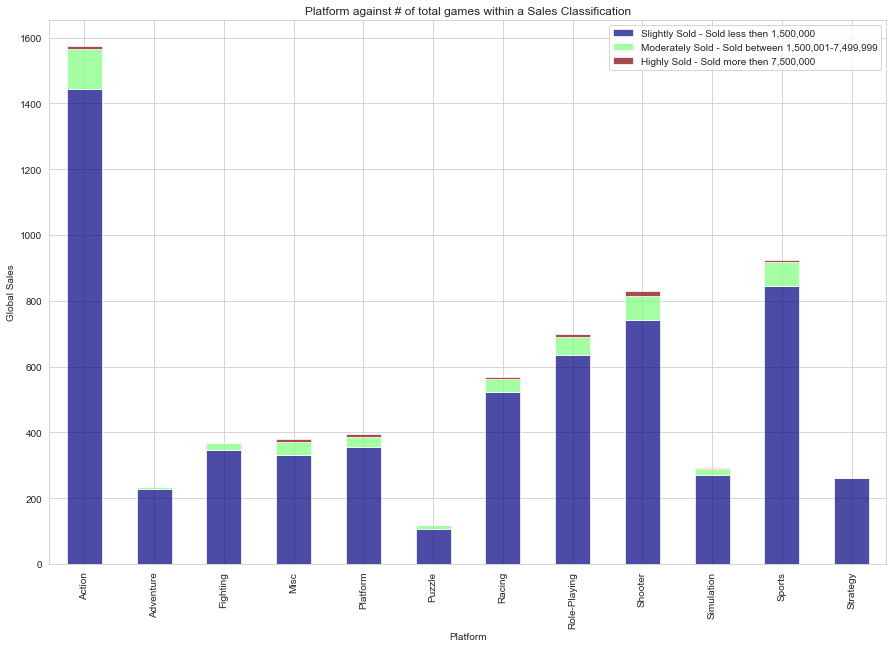

In [62]:
p3 = glob_high_genre.plot(kind = 'bar', stacked = True,
                    alpha = .70, cmap='jet',figsize=(15,10))
p3.set_title('Platform against # of total games within a Sales Classification')
p3.set_xlabel('Platform')
p3.set_ylabel('Global Sales')
p3.legend(['Slightly Sold - Sold less then 1,500,000', 'Moderately Sold - Sold between 1,500,001-7,499,999','Highly Sold - Sold more then 7,500,000'])
plt.show()

Critic Score Classification

Platform                      3DS    DC     DS    GBA     GC     PC    PS  \
Critic_Score_Classification                                                 
1                             1.0   NaN   28.0   11.0   15.0    6.0   9.0   
2                            97.0   NaN  284.0  110.0  177.0  232.0  57.0   
3                            52.0  14.0  154.0  116.0  156.0  381.0  84.0   

Platform                       PS2    PS3   PS4    PSP   PSV    Wii  WiiU  \
Critic_Score_Classification                                                 
1                             29.0   22.0   4.0    6.0   1.0   36.0   4.0   
2                            671.0  390.0  72.0  258.0  63.0  321.0  39.0   
3                            441.0  360.0  79.0  126.0  44.0  122.0  40.0   

Platform                      X360     XB  XOne  
Critic_Score_Classification                      
1                             49.0   20.0   4.0  
2                            440.0  278.0  40.0  
3                           

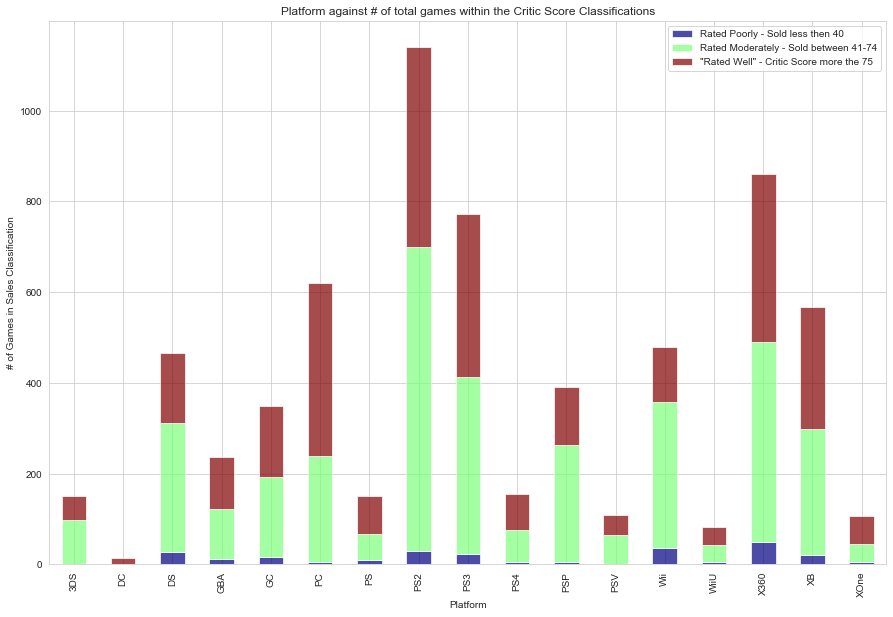

In [64]:
data_le_crit_clas = data_original.copy(deep=True)
data_le_crit_clas['Critic_Score_Classification'] = [3 if x  >= 75 else 1  if x  <= 40 else 2 for x in data_original['Critic_Score']]


crit_clas_plat = data_le_crit_clas.groupby(['Platform','Critic_Score_Classification']).Critic_Score_Classification.count().unstack()
# print(data_le_sales_clas.groupby(['Sold_Classification','Genre']).Global_Sales.count().unstack())
print(data_le_crit_clas.groupby(['Critic_Score_Classification','Platform']).Critic_Score.count().unstack())

p2 = crit_clas_plat.plot(kind = 'bar', stacked = True,
                    alpha = .70, cmap='jet',figsize=(15,10))
p2.set_title('Platform against # of total games within the Critic Score Classifications')
p2.set_xlabel('Platform')
p2.set_ylabel('# of Games in Sales Classification')
p2.legend(['Rated Poorly - Sold less then 40', 'Rated Moderately - Sold between 41-74','"Rated Well" - Critic Score more the 75'])
plt.show()

# Classification Modeling

## Setup for the Classifying

In [65]:
data_le_dummy.head(3)

,Name,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,User_Count,E,E10+,M,RP,T,3DS,DC,DS,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,Action,Adventure,Fighting,Misc,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Inc,10TACLE Studios,1C Company,2D Boy,3DO,505 Games,AQ Interactive,ASCII Entertainment,Acclaim Entertainment,Ackkstudios,Acquire,Activision,Activision Blizzard,Activision Value,Agatsuma Entertainment,Agetec,Aksys Games,Aqua Plus,Arc System Works,Ascaron Entertainment GmbH,Aspyr,Atari,Atlus,Avalon Interactive,BAM! Entertainment,Banpresto,Bethesda Softworks,Bigben Interactive,Black Bean Games,Black Label Games,Blue Byte,Bohemia Interactive,Brash Entertainment,CCP,CDV Software Entertainment,Capcom,Cave,City Interactive,Cloud Imperium Games Corporation,Codemasters,Codemasters Online,Compile Heart,Conspiracy Entertainment,Crave Entertainment,Crimson Cow,D3Publisher,DHM Interactive,DSI Games,DTP Entertainment,Deep Silver,Destination Software,Destineer,Devolver Digital,Disney Interactive Studios,DreamCatcher Interactive,EA Games,ESP,Eidos Interactive,Electronic Arts,Empire Interactive,Encore,Enix Corporation,Enterbrain,Evolved Games,Falcom Corporation,Flashpoint Games,Focus Home Interactive,Fox Interactive,From Software,FuRyu,Funbox Media,Funcom,Funsta,GOA,GT Interactive,Game Factory,Gamebridge,Gamecock,Gathering of Developers,Genki,Ghostlight,Global A Entertainment,Global Star,Gotham Games,Graffiti,Graphsim Entertainment,Groove Games,GungHo,Gust,HMH Interactive,Harmonix Music Systems,Hasbro Interactive,Havas Interactive,Hip Interactive,Home Entertainment Suppliers,Hudson Entertainment,Hudson Soft,Human Entertainment,Iceberg Interactive,Idea Factory,Idea Factory International,Ignition Entertainment,Indie Games,Infogrames,Interplay,Irem Software Engineering,Jaleco,Jester Interactive,JoWood Productions,Just Flight,Kadokawa Shoten,Kalypso Media,Kemco,Koch Media,Konami Digital Entertainment,Kool Kizz,Level 5,Lexicon Entertainment,Lighthouse Interactive,Little Orbit,LucasArts,MC2 Entertainment,MTV Games,Mad Catz,Majesco Entertainment,Marvelous Entertainment,Marvelous Interactive,Mastertronic,Mastiff,Max Five,Maxis,Media Rings,Mercury Games,Metro 3D,Microids,Microsoft Game Studios,Midas Interactive Entertainment,Midway Games,Milestone S.r.l.,Mindscape,Monte Christo Multimedia,Moss,Mud Duck Productions,Myelin Media,NCSoft,NDA Productions,Namco Bandai Games,Natsume,Navarre Corp,NewKidCo,Nihon Falcom Corporation,Nintendo,Nippon Ichi Software,Nobilis,Nordic Games,NovaLogic,Number None,O-Games,Oxygen Interactive,PM Studios,PQube,Pacific Century Cyber Works,Paradox Interactive,Phantagram,Phantom EFX,Pinnacle,Play It,Playlogic Game Factory,PopCap Games,Popcorn Arcade,Psygnosis,RTL,Rage Software,Rebellion,RedOctane,Reef Entertainment,Revolution Software,Rising Star Games,Rondomedia,Russel,SCi,SNK,Sammy Corporation,Scholastic Inc.,Screenlife,Sega,Slightly Mad Studios,Sony Computer Entertainment,Sony Computer Entertainment America,Sony Computer Entertainment Europe,Sony Online Entertainment,SouthPeak Games,Spike,Square,Square EA,Square Enix,Square Enix,SquareSoft,Sting,Strategy First,Success,Sunflowers,Sunsoft,Swing! Entertainment,System 3,System 3 Arcade Software,TDK Mediactive,THQ,Taito,Takara Tomy,Take-Two Interactive,TalonSoft,Team17 Software,Tecmo Koei,Telegames,Telltale Games,Tetris Online,The Adventure Company,Titus,Tomy Corporation,Touchstone,Trion Worlds,Tripwire Interactive,Tru Blu Entertainment,Ubisoft,Ubisoft Annecy,Universal Interactive,Unknown,Valcon Games,Valve Software,Virgin Interactive,Visco,Vivendi Games,Wanadoo,Wargaming.net,Warner Bros. Interactive Entertainment,White Park Bay Software,XS Games,Xicat Interactive,Xplosiv,Xseed Games,Yacht Club Games,Zoo Digital Publishing,Zoo Games,Zushi Games,bitComposer Games,id Software
0,.hack//Infection Part 1,2002,0.49,0.38,0.26,0.13,1.27,75,85.0,60.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [66]:
data_dummy_sales_clas = data_le_dummy.copy()
data_dummy_crit_scor_clas = data_le_dummy.copy()

In [67]:
# separate global sales into 3 groups  {Slightly Sold = Global Sales @ 1,500,000 or less; Moderately Sold = Global Sales @ 1500,001-7,499,999; Highly Sold = Global Sales @ 7,500,000 or more}
data_dummy_sales_clas['Sold_Classification'] = data_le_dummy['Sold_Classification'] = ['Highly Sold' if x  >= 7.5 else "Slightly Sold"  if x  <= 1.5 else 'Moderately Sold' for x in data_le_dummy['Global_Sales']]


In [68]:
# separated Critic Score into 3 groups  {1 = score @ 50 or less; 2 = score @ 51-74; 3 = score @ 75 or more}

#Avg Critic_score is 72.768

data_dummy_crit_scor_clas['Critic_Score_Classification'] = data_le_dummy['Critic_Score_Classification'] = [3 if x  >= 75 else 1  if x  <= 40 else 2 for x in data_le_dummy['Critic_Score']]



In [69]:
#dataframe with Global Sales Classification
data_dummy_sales_clas.tail(75)

,Name,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,User_Count,E,E10+,M,RP,T,3DS,DC,DS,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,Action,Adventure,Fighting,Misc,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Inc,10TACLE Studios,1C Company,2D Boy,3DO,505 Games,AQ Interactive,ASCII Entertainment,Acclaim Entertainment,Ackkstudios,Acquire,Activision,Activision Blizzard,Activision Value,Agatsuma Entertainment,Agetec,Aksys Games,Aqua Plus,Arc System Works,Ascaron Entertainment GmbH,Aspyr,Atari,Atlus,Avalon Interactive,BAM! Entertainment,Banpresto,Bethesda Softworks,Bigben Interactive,Black Bean Games,Black Label Games,Blue Byte,Bohemia Interactive,Brash Entertainment,CCP,CDV Software Entertainment,Capcom,Cave,City Interactive,Cloud Imperium Games Corporation,Codemasters,Codemasters Online,Compile Heart,Conspiracy Entertainment,Crave Entertainment,Crimson Cow,D3Publisher,DHM Interactive,DSI Games,DTP Entertainment,Deep Silver,Destination Software,Destineer,Devolver Digital,Disney Interactive Studios,DreamCatcher Interactive,EA Games,ESP,Eidos Interactive,Electronic Arts,Empire Interactive,Encore,Enix Corporation,Enterbrain,Evolved Games,Falcom Corporation,Flashpoint Games,Focus Home Interactive,Fox Interactive,From Software,FuRyu,Funbox Media,Funcom,Funsta,GOA,GT Interactive,Game Factory,Gamebridge,Gamecock,Gathering of Developers,Genki,Ghostlight,Global A Entertainment,Global Star,Gotham Games,Graffiti,Graphsim Entertainment,Groove Games,GungHo,Gust,HMH Interactive,Harmonix Music Systems,Hasbro Interactive,Havas Interactive,Hip Interactive,Home Entertainment Suppliers,Hudson Entertainment,Hudson Soft,Human Entertainment,Iceberg Interactive,Idea Factory,Idea Factory International,Ignition Entertainment,Indie Games,Infogrames,Interplay,Irem Software Engineering,Jaleco,Jester Interactive,JoWood Productions,Just Flight,Kadokawa Shoten,Kalypso Media,Kemco,Koch Media,Konami Digital Entertainment,Kool Kizz,Level 5,Lexicon Entertainment,Lighthouse Interactive,Little Orbit,LucasArts,MC2 Entertainment,MTV Games,Mad Catz,Majesco Entertainment,Marvelous Entertainment,Marvelous Interactive,Mastertronic,Mastiff,Max Five,Maxis,Media Rings,Mercury Games,Metro 3D,Microids,Microsoft Game Studios,Midas Interactive Entertainment,Midway Games,Milestone S.r.l.,Mindscape,Monte Christo Multimedia,Moss,Mud Duck Productions,Myelin Media,NCSoft,NDA Productions,Namco Bandai Games,Natsume,Navarre Corp,NewKidCo,Nihon Falcom Corporation,Nintendo,Nippon Ichi Software,Nobilis,Nordic Games,NovaLogic,Number None,O-Games,Oxygen Interactive,PM Studios,PQube,Pacific Century Cyber Works,Paradox Interactive,Phantagram,Phantom EFX,Pinnacle,Play It,Playlogic Game Factory,PopCap Games,Popcorn Arcade,Psygnosis,RTL,Rage Software,Rebellion,RedOctane,Reef Entertainment,Revolution Software,Rising Star Games,Rondomedia,Russel,SCi,SNK,Sammy Corporation,Scholastic Inc.,Screenlife,Sega,Slightly Mad Studios,Sony Computer Entertainment,Sony Computer Entertainment America,Sony Computer Entertainment Europe,Sony Online Entertainment,SouthPeak Games,Spike,Square,Square EA,Square Enix,Square Enix,SquareSoft,Sting,Strategy First,Success,Sunflowers,Sunsoft,Swing! Entertainment,System 3,System 3 Arcade Software,TDK Mediactive,THQ,Taito,Takara Tomy,Take-Two Interactive,TalonSoft,Team17 Software,Tecmo Koei,Telegames,Telltale Games,Tetris Online,The Adventure Company,Titus,Tomy Corporation,Touchstone,Trion Worlds,Tripwire Interactive,Tru Blu Entertainment,Ubisoft,Ubisoft Annecy,Universal Interactive,Unknown,Valcon Games,Valve Software,Virgin Interactive,Visco,Vivendi Games,Wanadoo,Wargaming.net,Warner Bros. Interactive Entertainment,White Park Bay Software,XS Games,Xicat Interactive,Xplosiv,Xseed Games,Yacht Club Games,Zoo Digital Publishing,Zoo Games,Zushi Games,bitComposer Games,id Software,Sold_Classification
4203,X-Men Origins: Wolverine,2009,0.15,0.03,0.00,0.02,0.20,55,81.0,8.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,

In [70]:
#dataframe with Critic Score Classification
data_dummy_crit_scor_clas.head()

,Name,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,User_Count,E,E10+,M,RP,T,3DS,DC,DS,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,Action,Adventure,Fighting,Misc,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Inc,10TACLE Studios,1C Company,2D Boy,3DO,505 Games,AQ Interactive,ASCII Entertainment,Acclaim Entertainment,Ackkstudios,Acquire,Activision,Activision Blizzard,Activision Value,Agatsuma Entertainment,Agetec,Aksys Games,Aqua Plus,Arc System Works,Ascaron Entertainment GmbH,Aspyr,Atari,Atlus,Avalon Interactive,BAM! Entertainment,Banpresto,Bethesda Softworks,Bigben Interactive,Black Bean Games,Black Label Games,Blue Byte,Bohemia Interactive,Brash Entertainment,CCP,CDV Software Entertainment,Capcom,Cave,City Interactive,Cloud Imperium Games Corporation,Codemasters,Codemasters Online,Compile Heart,Conspiracy Entertainment,Crave Entertainment,Crimson Cow,D3Publisher,DHM Interactive,DSI Games,DTP Entertainment,Deep Silver,Destination Software,Destineer,Devolver Digital,Disney Interactive Studios,DreamCatcher Interactive,EA Games,ESP,Eidos Interactive,Electronic Arts,Empire Interactive,Encore,Enix Corporation,Enterbrain,Evolved Games,Falcom Corporation,Flashpoint Games,Focus Home Interactive,Fox Interactive,From Software,FuRyu,Funbox Media,Funcom,Funsta,GOA,GT Interactive,Game Factory,Gamebridge,Gamecock,Gathering of Developers,Genki,Ghostlight,Global A Entertainment,Global Star,Gotham Games,Graffiti,Graphsim Entertainment,Groove Games,GungHo,Gust,HMH Interactive,Harmonix Music Systems,Hasbro Interactive,Havas Interactive,Hip Interactive,Home Entertainment Suppliers,Hudson Entertainment,Hudson Soft,Human Entertainment,Iceberg Interactive,Idea Factory,Idea Factory International,Ignition Entertainment,Indie Games,Infogrames,Interplay,Irem Software Engineering,Jaleco,Jester Interactive,JoWood Productions,Just Flight,Kadokawa Shoten,Kalypso Media,Kemco,Koch Media,Konami Digital Entertainment,Kool Kizz,Level 5,Lexicon Entertainment,Lighthouse Interactive,Little Orbit,LucasArts,MC2 Entertainment,MTV Games,Mad Catz,Majesco Entertainment,Marvelous Entertainment,Marvelous Interactive,Mastertronic,Mastiff,Max Five,Maxis,Media Rings,Mercury Games,Metro 3D,Microids,Microsoft Game Studios,Midas Interactive Entertainment,Midway Games,Milestone S.r.l.,Mindscape,Monte Christo Multimedia,Moss,Mud Duck Productions,Myelin Media,NCSoft,NDA Productions,Namco Bandai Games,Natsume,Navarre Corp,NewKidCo,Nihon Falcom Corporation,Nintendo,Nippon Ichi Software,Nobilis,Nordic Games,NovaLogic,Number None,O-Games,Oxygen Interactive,PM Studios,PQube,Pacific Century Cyber Works,Paradox Interactive,Phantagram,Phantom EFX,Pinnacle,Play It,Playlogic Game Factory,PopCap Games,Popcorn Arcade,Psygnosis,RTL,Rage Software,Rebellion,RedOctane,Reef Entertainment,Revolution Software,Rising Star Games,Rondomedia,Russel,SCi,SNK,Sammy Corporation,Scholastic Inc.,Screenlife,Sega,Slightly Mad Studios,Sony Computer Entertainment,Sony Computer Entertainment America,Sony Computer Entertainment Europe,Sony Online Entertainment,SouthPeak Games,Spike,Square,Square EA,Square Enix,Square Enix,SquareSoft,Sting,Strategy First,Success,Sunflowers,Sunsoft,Swing! Entertainment,System 3,System 3 Arcade Software,TDK Mediactive,THQ,Taito,Takara Tomy,Take-Two Interactive,TalonSoft,Team17 Software,Tecmo Koei,Telegames,Telltale Games,Tetris Online,The Adventure Company,Titus,Tomy Corporation,Touchstone,Trion Worlds,Tripwire Interactive,Tru Blu Entertainment,Ubisoft,Ubisoft Annecy,Universal Interactive,Unknown,Valcon Games,Valve Software,Virgin Interactive,Visco,Vivendi Games,Wanadoo,Wargaming.net,Warner Bros. Interactive Entertainment,White Park Bay Software,XS Games,Xicat Interactive,Xplosiv,Xseed Games,Yacht Club Games,Zoo Digital Publishing,Zoo Games,Zushi Games,bitComposer Games,id Software,Critic_Score_Classification
0,.hack//Infection Part 1,2002,0.49,0.38,0.26,0.13,1.27,75,85.0,60.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [71]:
data_le_dummy = data_le_dummy.drop(columns=['Critic_Score_Classification', 'Sold_Classification'])
data_le_dummy.head(3)

,Name,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,User_Count,E,E10+,M,RP,T,3DS,DC,DS,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,Action,Adventure,Fighting,Misc,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Inc,10TACLE Studios,1C Company,2D Boy,3DO,505 Games,AQ Interactive,ASCII Entertainment,Acclaim Entertainment,Ackkstudios,Acquire,Activision,Activision Blizzard,Activision Value,Agatsuma Entertainment,Agetec,Aksys Games,Aqua Plus,Arc System Works,Ascaron Entertainment GmbH,Aspyr,Atari,Atlus,Avalon Interactive,BAM! Entertainment,Banpresto,Bethesda Softworks,Bigben Interactive,Black Bean Games,Black Label Games,Blue Byte,Bohemia Interactive,Brash Entertainment,CCP,CDV Software Entertainment,Capcom,Cave,City Interactive,Cloud Imperium Games Corporation,Codemasters,Codemasters Online,Compile Heart,Conspiracy Entertainment,Crave Entertainment,Crimson Cow,D3Publisher,DHM Interactive,DSI Games,DTP Entertainment,Deep Silver,Destination Software,Destineer,Devolver Digital,Disney Interactive Studios,DreamCatcher Interactive,EA Games,ESP,Eidos Interactive,Electronic Arts,Empire Interactive,Encore,Enix Corporation,Enterbrain,Evolved Games,Falcom Corporation,Flashpoint Games,Focus Home Interactive,Fox Interactive,From Software,FuRyu,Funbox Media,Funcom,Funsta,GOA,GT Interactive,Game Factory,Gamebridge,Gamecock,Gathering of Developers,Genki,Ghostlight,Global A Entertainment,Global Star,Gotham Games,Graffiti,Graphsim Entertainment,Groove Games,GungHo,Gust,HMH Interactive,Harmonix Music Systems,Hasbro Interactive,Havas Interactive,Hip Interactive,Home Entertainment Suppliers,Hudson Entertainment,Hudson Soft,Human Entertainment,Iceberg Interactive,Idea Factory,Idea Factory International,Ignition Entertainment,Indie Games,Infogrames,Interplay,Irem Software Engineering,Jaleco,Jester Interactive,JoWood Productions,Just Flight,Kadokawa Shoten,Kalypso Media,Kemco,Koch Media,Konami Digital Entertainment,Kool Kizz,Level 5,Lexicon Entertainment,Lighthouse Interactive,Little Orbit,LucasArts,MC2 Entertainment,MTV Games,Mad Catz,Majesco Entertainment,Marvelous Entertainment,Marvelous Interactive,Mastertronic,Mastiff,Max Five,Maxis,Media Rings,Mercury Games,Metro 3D,Microids,Microsoft Game Studios,Midas Interactive Entertainment,Midway Games,Milestone S.r.l.,Mindscape,Monte Christo Multimedia,Moss,Mud Duck Productions,Myelin Media,NCSoft,NDA Productions,Namco Bandai Games,Natsume,Navarre Corp,NewKidCo,Nihon Falcom Corporation,Nintendo,Nippon Ichi Software,Nobilis,Nordic Games,NovaLogic,Number None,O-Games,Oxygen Interactive,PM Studios,PQube,Pacific Century Cyber Works,Paradox Interactive,Phantagram,Phantom EFX,Pinnacle,Play It,Playlogic Game Factory,PopCap Games,Popcorn Arcade,Psygnosis,RTL,Rage Software,Rebellion,RedOctane,Reef Entertainment,Revolution Software,Rising Star Games,Rondomedia,Russel,SCi,SNK,Sammy Corporation,Scholastic Inc.,Screenlife,Sega,Slightly Mad Studios,Sony Computer Entertainment,Sony Computer Entertainment America,Sony Computer Entertainment Europe,Sony Online Entertainment,SouthPeak Games,Spike,Square,Square EA,Square Enix,Square Enix,SquareSoft,Sting,Strategy First,Success,Sunflowers,Sunsoft,Swing! Entertainment,System 3,System 3 Arcade Software,TDK Mediactive,THQ,Taito,Takara Tomy,Take-Two Interactive,TalonSoft,Team17 Software,Tecmo Koei,Telegames,Telltale Games,Tetris Online,The Adventure Company,Titus,Tomy Corporation,Touchstone,Trion Worlds,Tripwire Interactive,Tru Blu Entertainment,Ubisoft,Ubisoft Annecy,Universal Interactive,Unknown,Valcon Games,Valve Software,Virgin Interactive,Visco,Vivendi Games,Wanadoo,Wargaming.net,Warner Bros. Interactive Entertainment,White Park Bay Software,XS Games,Xicat Interactive,Xplosiv,Xseed Games,Yacht Club Games,Zoo Digital Publishing,Zoo Games,Zushi Games,bitComposer Games,id Software
0,.hack//Infection Part 1,2002,0.49,0.38,0.26,0.13,1.27,75,85.0,60.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

## Classification for Critic's Score 

In [72]:
# Had to drop a few features to increase accuracy

X2 = data_dummy_crit_scor_clas.drop([
'Critic_Score_Classification',
'Name',
'10TACLE Studios',
'Ascaron Entertainment GmbH',
'Blue Byte',
'Bohemia Interactive',
'Conspiracy Entertainment',
'Crimson Cow',
'DSI Games',
'Devolver Digital','ESP',
'Fox Interactive',
'Gamebridge',
'Global A Entertainment',
'HMH Interactive',
'Harmonix Music Systems',
'Iceberg Interactive',
'Idea Factory International',
'Kool Kizz',
'Max Five',
'Media Rings',
'Mud Duck Productions',
'Nobilis',
'NovaLogic',
'Phantagram',
'Pinnacle',
'RP',
'Rebellion',
'Revolution Software',
'Sunflowers',
'Sunsoft',
'TalonSoft',
'Visco',
'White Park Bay Software',
'Yacht Club Games',
'Zushi Games',
'2D Boy',
'Ackkstudios',
'Agetec',
'Aqua Plus',
'Avalon Interactive',
'Brash Entertainment',
'Cave',
'City Interactive',
'Deep Silver',
'Destineer',
'DreamCatcher Interactive',
'Empire Interactive',
'Falcom Corporation',
'From Software',
'Ghostlight',
'Graphsim Entertainment',
'Groove Games',
'GungHo',
'Havas Interactive',
'Idea Factory',
'JoWood Productions',
'Just Flight',
'Lexicon Entertainment',
'Little Orbit',
'Metro 3D',
'Milestone S.r.l.',
'Mindscape',
'Nordic Games',
'Number None',
'Phantom EFX',
'Popcorn Arcade',
'Psygnosis',
'RTL',
'Rage Software',
'Rondomedia',
'Sammy Corporation',
'Screenlife',
'T',
'Takara Tomy',
'Tripwire Interactive',
'Valcon Games',
'Wanadoo',
'Xicat Interactive',
'Xplosiv',
'3DO',
'505 Games',
'BAM! Entertainment',
'Home Entertainment Suppliers',
'Ignition Entertainment',
'Jaleco',
'Kalypso Media',
'Kemco',
'Lighthouse Interactive',
'MTV Games',
'Majesco Entertainment',
'Nihon Falcom Corporation',
'Scholastic Inc.',
'Square',
'Sting',
'Success',
'Tru Blu Entertainment',
'Vivendi Games',
'Critic_Score'
], axis = 1)

y2 = data_dummy_crit_scor_clas['Critic_Score_Classification']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state=3)

print(f'{X2.shape},\n {y2.shape} ')

(4278, 190),
 (4278,) 


In [73]:
# for feature in sorted(zip(rf.feature_importances_, list(X2_train.columns))):
#     print(feature)

### Baseline

In [74]:
dummy_c = DummyClassifier()
dummy_c.fit(X2_train, y2_train)
y2_pred_dummy = dummy_c.predict(X2_test)

dummy_c_evalution = run_model('Baseline', dummy_c,X2,y2,y2_test,y2_pred_dummy)
print_model("Baseline", dummy_c,X2,y2,y2_test,y2_pred_dummy)


Baseline Prediction accuracy is: 0.48909657320872274
 Baseline Mean cross validation is: 0.46022220124243785
  Baseline Precision score is: 0.4906519080661477
   Baseline Prediction recall score is: 0.48909657320872274
    Baseline Prediction f1 score is: 0.48981182222954434


Confusion Matrix

[[  0  28  28]
 [ 28 395 279]
 [ 28 265 233]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        56
           2       0.57      0.56      0.57       702
           3       0.43      0.44      0.44       526

    accuracy                           0.49      1284
   macro avg       0.34      0.34      0.34      1284
weighted avg       0.49      0.49      0.49      1284

Confusion Matrix, without normalization
[[  0  28  28]
 [ 28 395 279]
 [ 28 265 233]]


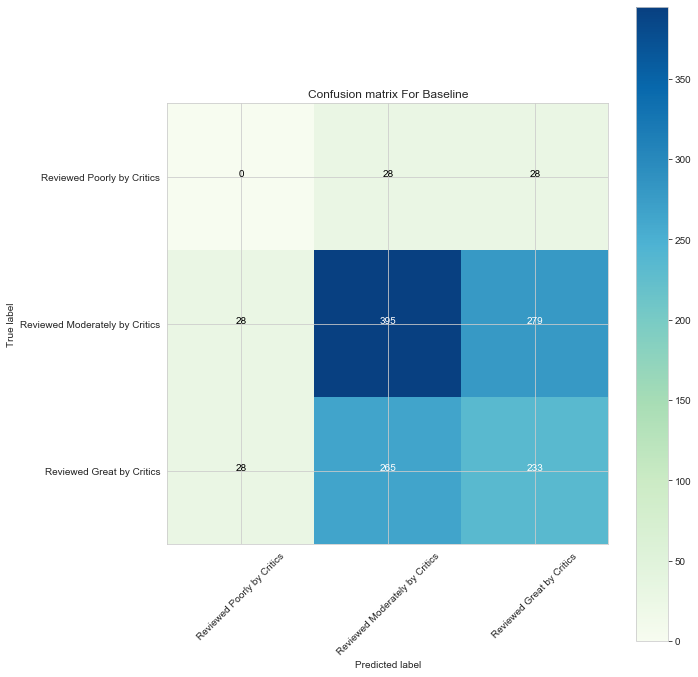

In [75]:
#text confusion matrix
print(confusion_matrix(y2_test, y2_pred_dummy))
print(classification_report(y2_test, y2_pred_dummy))

#visual confusion matrix
cm2 = confusion_matrix(y2_test,y2_pred_dummy)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm2, classes,
                          normalize=False,
                          title='Confusion matrix For Baseline',
                          cmap=plt.cm.GnBu,)

In [76]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_dummy[0:25])
print(f'Accurary from 1st 25 values is {(11/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [3 2 3 2 2 3 3 3 3 2 3 3 2 2 3 2 2 2 2 2 3 3 3 3 3]
Accurary from 1st 25 values is 44.0%


### Logistic Regression Model

In [77]:
#LogisticRegression
logreg2= LogisticRegression()
logreg2.fit(X2_train,y2_train)
y2_pred_logreg = logreg2.predict(X2_test)

logreg_accuracy_train2 = logreg2.score(X2_train ,y2_train)
logreg_accuracy_test2 = logreg2.score(X2_test,y2_test)


# Cross Validation - Logistic Regression

logreg_cross_val_score2 = cross_val_score(logreg2, X2,y2, cv=10)
logreg_cv_score_avg2 = logreg_cross_val_score2.mean()
cv_pred_logreg2 = cross_val_predict(logreg2, X2_test, y2_test, cv=10)
                                              
             
print(f'Logistic Regression train accuracy is {logreg_accuracy_train2}\nLogistic Regression test accuracy is {logreg_accuracy_test2}\nMean Cross Validation logreg Regression is: {logreg_cv_score_avg2}')
y2_predict_proba_logreg2 = logreg2.predict_proba(X2_test)[:, 1]


logreg_evalution = run_model('Logistic Regression', logreg2,X2,y2,y2_test,y2_pred_logreg)
print_model("Logistic Regression", logreg2,X2,y2,y2_test,y2_pred_logreg)


Logistic Regression train accuracy is 0.7668670674682698
Logistic Regression test accuracy is 0.7087227414330218
Mean Cross Validation logreg Regression is: 0.725800674257248
Logistic Regression Prediction accuracy is: 0.7087227414330218
 Logistic Regression Mean cross validation is: 0.725800674257248
  Logistic Regression Precision score is: 0.7204677335608574
   Logistic Regression Prediction recall score is: 0.7087227414330218
    Logistic Regression Prediction f1 score is: 0.695461166578982


In [78]:
dictionary = dict(zip(list(X2_train.columns), list(logreg2.coef_[0])))
dictionary

{'Year_of_Release': 0.0021475055628130415,
 'NA_Sales': -0.006102701427460389,
 'EU_Sales': 0.17791195970478088,
 'JP_Sales': -0.4736879383945702,
 'Other_Sales': -0.3068023024885079,
 'Global_Sales': -0.5778452185114635,
 'User_Score': -0.10634275497087221,
 'User_Count': -0.0012834516583573275,
 'E': -0.3331033413607135,
 'E10+': -0.924775338720408,
 'M': 0.3979582623441958,
 '3DS': -0.3636326551025337,
 'DC': -0.043768974354399456,
 'DS': 0.042907549966544715,
 'GC': 0.1317350404018655,
 'PC': -0.8055205898775759,
 'PS': 0.4355437083757914,
 'PS2': -0.6976785632163011,
 'PS3': -1.014763038489965,
 'PS4': -0.8556191711758784,
 'PSP': -1.1503909412024547,
 'PSV': -0.8712783031632275,
 'Wii': 0.4083116289495097,
 'WiiU': -0.2619741253380491,
 'X360': -0.09038077517569015,
 'XB': -1.0067767002976844,
 'XOne': -0.49575578560281863,
 'Action': 0.6404113028795038,
 'Adventure': 0.03726539326430986,
 'Fighting': 0.09705534896836132,
 'Misc': 0.010979017505555747,
 'Racing': 0.36029249824921

Text(0, 0.5, 'Frequency')

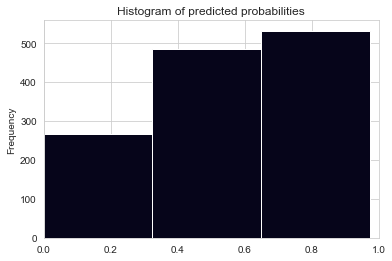

In [79]:
plt.hist(y2_predict_proba_logreg2, bins=3)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.ylabel('Frequency')

In [80]:
# fpr, tpr, thresholds = metrics.roc_curve(y2_test, y2_predict_proba_logreg2)
# plt.plot(fpr, tpr)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])

Confusion Matrix

[[  4  52   0]
 [  0 557 145]
 [  0 177 349]]
              precision    recall  f1-score   support

           1       1.00      0.07      0.13        56
           2       0.71      0.79      0.75       702
           3       0.71      0.66      0.68       526

    accuracy                           0.71      1284
   macro avg       0.81      0.51      0.52      1284
weighted avg       0.72      0.71      0.70      1284

Confusion Matrix, without normalization
[[  4  52   0]
 [  0 557 145]
 [  0 177 349]]


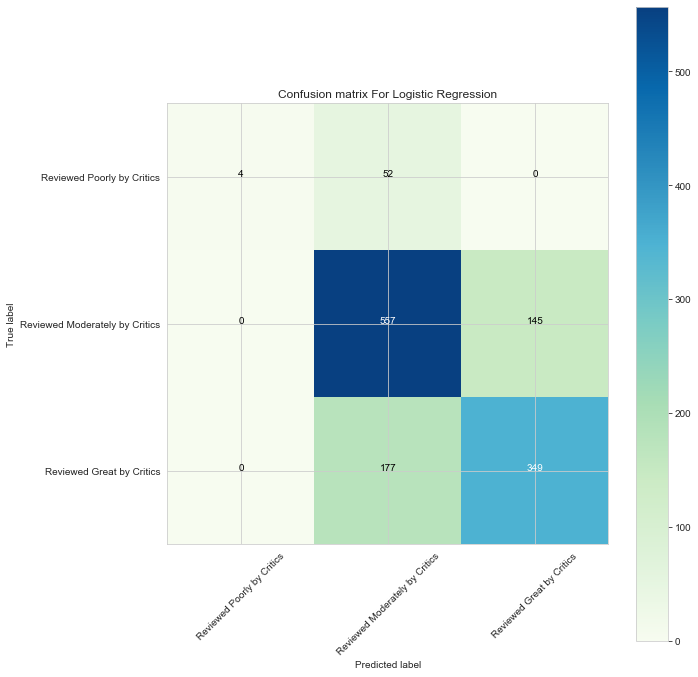

In [81]:
#text confusion matrix
print(confusion_matrix(y2_test, y2_pred_logreg))
print(classification_report(y2_test, y2_pred_logreg))

#visual confusion matrix
cm2 = confusion_matrix(y2_test,y2_pred_logreg)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm2, classes,
                          normalize=False,
                          title='Confusion matrix For Logistic Regression',
                          cmap=plt.cm.GnBu,)

In [82]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_logreg[0:25])
print(f'Accurary from 1st 25 values is {(18/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [2 3 2 3 2 3 2 2 3 3 2 2 2 3 2 3 2 3 2 3 3 3 2 3 2]
Accurary from 1st 25 values is 72.0%


### KNN Model - Best Preformming Model 

In [83]:
# K_nearest Neighbor = 5
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X2_test, y2_test)
y2_pred_knn5 = knn5.predict(X2_test)


# K_nearest Neighbor = 3 
knn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn3.fit(X2_test, y2_test)
y2_pred_knn3 = knn3.predict(X2_test)


# Testing Accuracy
knn5_accuracy_train2 = knn5.score(X2_train,y2_train)
knn5_accuracy_test2 = knn5.score(X2_test,y2_test)

knn3_accuracy_train2 = knn3.score(X2_train,y2_train)
knn3_accuracy_test2 = knn3.score(X2_test,y2_test)

# Printing Accuracy
print(f'K_nearest Neighbor = 5 Regression train accuracy is {knn5_accuracy_train2}\n K_nearest Neighbor = 5 Regression test accuracy is {knn5_accuracy_test2}')
knn5_evalution = run_model('K_nearest Neighbor = 5', knn5,X2,y2,y2_test,y2_pred_knn5)
print_model("K_nearest Neighbor = 5", knn5,X2,y2,y2_test,y2_pred_knn5)


print(f'\n\nK_nearest Neighbor = 3 Regression train accuracy is {knn3_accuracy_train2}\n K_nearest Neighbor = 3 Regression test accuracy is {knn3_accuracy_test2}')
knn3_evalution = run_model('K_nearest Neighbor = 3', knn3,X2,y2,y2_test,y2_pred_knn3)
print_model("K_nearest Neighbor = 3", knn3,X2,y2,y2_test,y2_pred_knn3)



y2_predict_proba_knn5 = knn5.predict_proba(X2_test)

K_nearest Neighbor = 5 Regression train accuracy is 0.6937207748830996
 K_nearest Neighbor = 5 Regression test accuracy is 0.8014018691588785
K_nearest Neighbor = 5 Prediction accuracy is: 0.8014018691588785
 K_nearest Neighbor = 5 Mean cross validation is: 0.7036186420324787
  K_nearest Neighbor = 5 Precision score is: 0.8012039094938139
   K_nearest Neighbor = 5 Prediction recall score is: 0.8014018691588785
    K_nearest Neighbor = 5 Prediction f1 score is: 0.7973095375065945


K_nearest Neighbor = 3 Regression train accuracy is 0.676686706746827
 K_nearest Neighbor = 3 Regression test accuracy is 0.8255451713395638
K_nearest Neighbor = 3 Prediction accuracy is: 0.8255451713395638
 K_nearest Neighbor = 3 Mean cross validation is: 0.691460840308908
  K_nearest Neighbor = 3 Precision score is: 0.82343532763037
   K_nearest Neighbor = 3 Prediction recall score is: 0.8255451713395638
    K_nearest Neighbor = 3 Prediction f1 score is: 0.8234861089180486


Confusion Matrix

[[ 21  34   1]
 [  7 607  88]
 [  0 125 401]]
              precision    recall  f1-score   support

           1       0.75      0.38      0.50        56
           2       0.79      0.86      0.83       702
           3       0.82      0.76      0.79       526

    accuracy                           0.80      1284
   macro avg       0.79      0.67      0.71      1284
weighted avg       0.80      0.80      0.80      1284

Confusion Matrix, without normalization
[[ 21  34   1]
 [  7 607  88]
 [  0 125 401]]


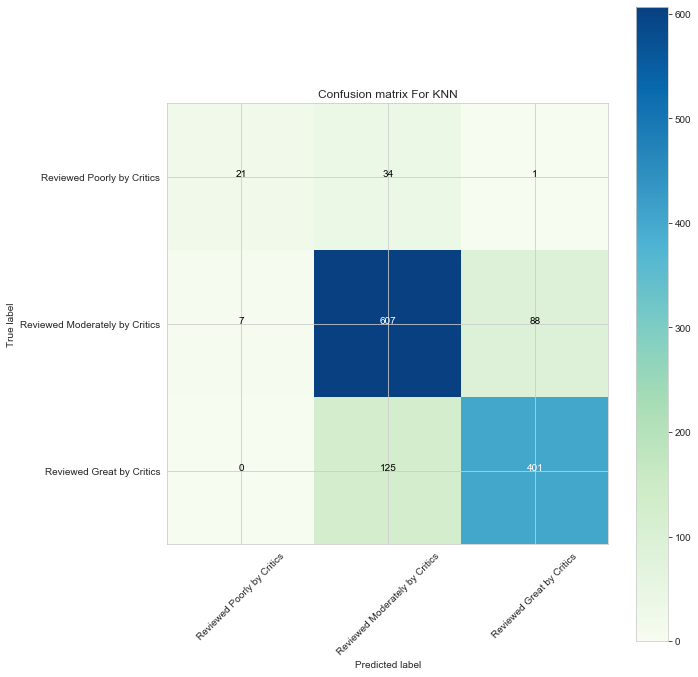

In [84]:
print(confusion_matrix(y2_test, y2_pred_knn5))
print(classification_report(y2_test, y2_pred_knn5))


cm = confusion_matrix(y2_test,y2_pred_knn5)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix For KNN',
                          cmap=plt.cm.GnBu)

In [85]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_knn3[0:25])
print(f'Accurary from 1st 25 values is {(18/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [2 3 3 3 2 3 3 2 3 3 1 2 2 3 2 2 2 3 2 2 3 2 2 3 3]
Accurary from 1st 25 values is 72.0%


### Random Forest Classifier

In [86]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X2_train,y2_train)
rf.score(X2_test,y2_test)
y2_pred_rf_2 = rf.predict(X2_test)

rf_accuracy_train_2 = rf.score(X2_train,y2_train)
rf_accuracy_test_2 = rf.score(X2_test,y2_test)

predict_acc = metrics.accuracy_score(y2_test,y2_pred_rf_2)
print(f'Random Forest Classifier train accuracy is {rf_accuracy_train_2}\nRandom Forest Classifier test accuracy is {rf_accuracy_test_2}\n')

rf_evalution = run_model('Random Forest', rf,X2,y2,y2_test,y2_pred_rf_2)
print_model("Random Forest Classifier", rf,X2,y2,y2_test,y2_pred_rf_2)

Random Forest Classifier train accuracy is 0.9889779559118237
Random Forest Classifier test accuracy is 0.7219626168224299

Random Forest Classifier Prediction accuracy is: 0.7219626168224299
 Random Forest Classifier Mean cross validation is: 0.7211288867938278
  Random Forest Classifier Precision score is: 0.7233271207653519
   Random Forest Classifier Prediction recall score is: 0.7219626168224299
    Random Forest Classifier Prediction f1 score is: 0.7109294103366413


Confusion Matrix

[[ 11  41   4]
 [  7 597  98]
 [  0 207 319]]
              precision    recall  f1-score   support

           1       0.61      0.20      0.30        56
           2       0.71      0.85      0.77       702
           3       0.76      0.61      0.67       526

    accuracy                           0.72      1284
   macro avg       0.69      0.55      0.58      1284
weighted avg       0.72      0.72      0.71      1284

Confusion Matrix, without normalization
[[ 11  41   4]
 [  7 597  98]
 [  0 207 319]]


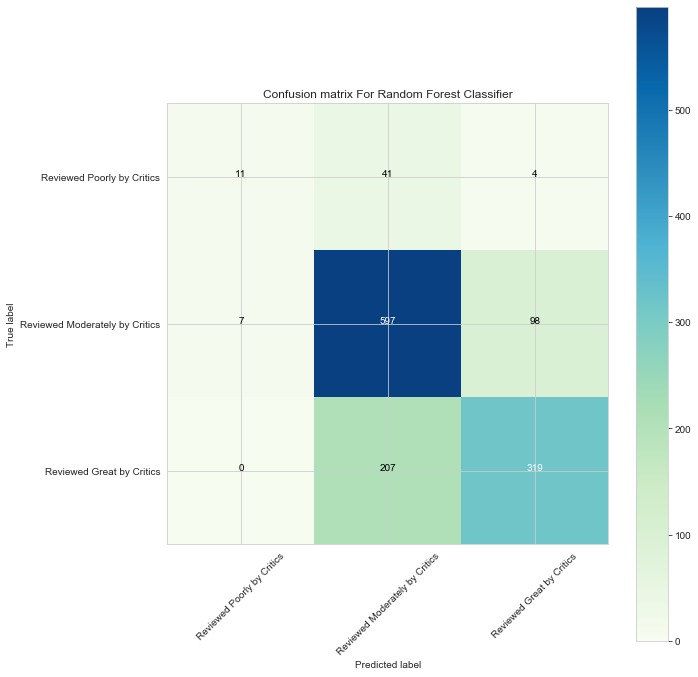

In [87]:
print(confusion_matrix(y2_test, y2_pred_rf_2))
print(classification_report(y2_test, y2_pred_rf_2))


cm3 = confusion_matrix(y2_test,y2_pred_rf_2)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm3, classes,
                          normalize=False,
                          title='Confusion matrix For Random Forest Classifier',
                          cmap=plt.cm.GnBu,)

In [88]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_rf_2[0:25])
print(f'Accurary from 1st 25 values is {(16/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [3 2 3 2 2 3 2 3 3 3 1 2 2 3 2 2 2 3 2 2 3 2 2 3 2]
Accurary from 1st 25 values is 64.0%


### Support Vector Classification

In [89]:
# Support Vector Classification
svc = svm.SVC()
svc.fit(X2_train,y2_train)
svc.score(X2_test,y2_test)
y2_pred_svc = svc.predict(X2_test)

svc_accuracy_train_2 = svc.score(X2_train,y2_train)
svc_accuracy_test_2 = svc.score(X2_test,y2_test)


print(f'Support Vector Classification train accuracy is {svc_accuracy_train_2}\nSupport Vector Classification test accuracy is {svc_accuracy_test_2}')

svc_evalution = run_model('Support Vector Classification', svc,X2,y2,y2_test,y2_pred_svc)
print_model("Support Vector Classification", svc,X2,y2,y2_test,y2_pred_svc)

Support Vector Classification train accuracy is 0.7702070808283233
Support Vector Classification test accuracy is 0.7149532710280374
Support Vector Classification Prediction accuracy is: 0.7149532710280374
 Support Vector Classification Mean cross validation is: 0.7304922676332767
  Support Vector Classification Precision score is: 0.713980686771074
   Support Vector Classification Prediction recall score is: 0.7149532710280374
    Support Vector Classification Prediction f1 score is: 0.7049593270399589


Confusion Matrix

[[ 11  40   5]
 [  7 583 112]
 [  0 202 324]]
              precision    recall  f1-score   support

           1       0.61      0.20      0.30        56
           2       0.71      0.83      0.76       702
           3       0.73      0.62      0.67       526

    accuracy                           0.71      1284
   macro avg       0.68      0.55      0.58      1284
weighted avg       0.71      0.71      0.70      1284

Confusion Matrix, without normalization
[[ 11  40   5]
 [  7 583 112]
 [  0 202 324]]


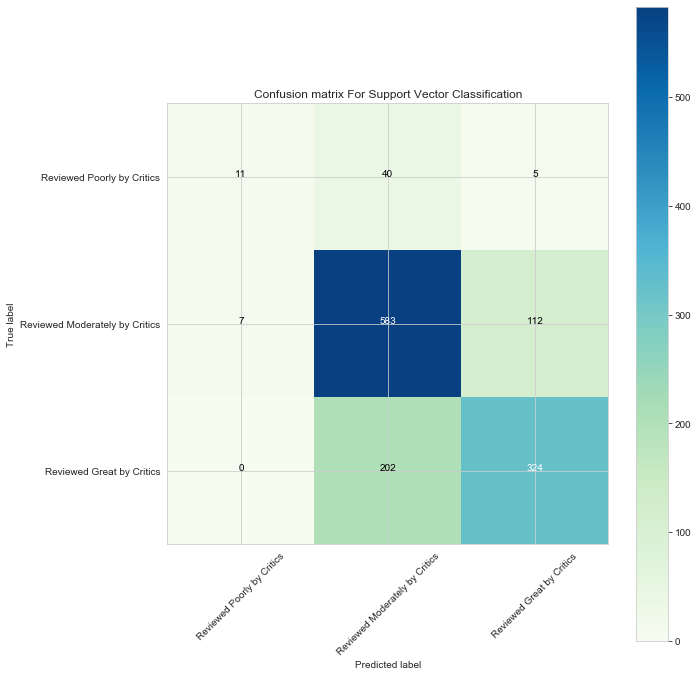

In [90]:
print(confusion_matrix(y2_test, y2_pred_svc))
print(classification_report(y2_test, y2_pred_svc))

cm4 = confusion_matrix(y2_test,y2_pred_svc)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm4, classes,
                          normalize=False,
                          title='Confusion matrix For Support Vector Classification',
                          cmap=plt.cm.GnBu)

In [91]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_svc[0:25])
print(f'Support Vector Classification Accurary from 1st 25 values is {(15/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [2 2 3 3 2 3 3 2 3 2 2 2 2 3 2 2 2 3 3 2 3 2 2 3 2]
Support Vector Classification Accurary from 1st 25 values is 60.0%


### Bagging Trees Classifier 

In [103]:
bt2 = BaggingClassifier(base_estimator=svc, n_estimators=10, random_state=3).fit(X2_train, y2_train)

y2_pred_bt2 = bt2.predict(X2_test)

bt2_evalution = run_model('Bagging Trees', bt2,X2,y2,y2_test,y2_pred_bt2)
print_model('Bagging Trees', bt2,X2,y2,y2_test,y2_pred_bt2)

Bagging Trees Prediction accuracy is: 0.7126168224299065
 Bagging Trees Mean cross validation is: 0.7332976782210949
  Bagging Trees Precision score is: 0.7115975119412279
   Bagging Trees Prediction recall score is: 0.7126168224299065
    Bagging Trees Prediction f1 score is: 0.7046387410257757


Confusion Matrix

[[ 15  36   5]
 [ 11 580 111]
 [  0 206 320]]
              precision    recall  f1-score   support

           1       0.58      0.27      0.37        56
           2       0.71      0.83      0.76       702
           3       0.73      0.61      0.67       526

    accuracy                           0.71      1284
   macro avg       0.67      0.57      0.60      1284
weighted avg       0.71      0.71      0.70      1284

Confusion Matrix, without normalization
[[ 15  36   5]
 [ 11 580 111]
 [  0 206 320]]


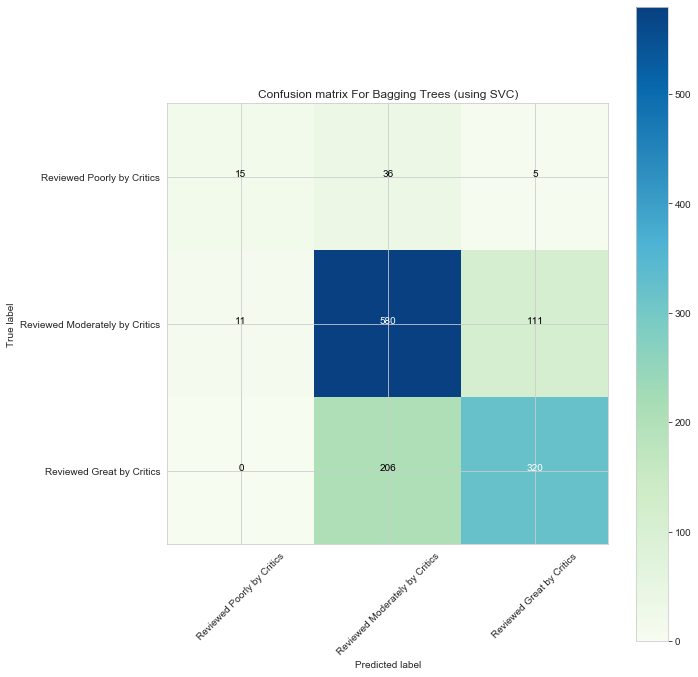

In [104]:
print(confusion_matrix(y2_test, y2_pred_bt2))
print(classification_report(y2_test, y2_pred_bt2))


cm7 = confusion_matrix(y2_test,y2_pred_bt2)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm7, classes,
                          normalize=False,
                          title='Confusion matrix For Bagging Trees (using SVC)',
                          cmap=plt.cm.GnBu)

In [105]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_bt2[0:25])
print(f'Bagging Trees (using SVC) Accurary from 1st 25 values is {(15/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [2 2 3 3 2 3 3 2 3 2 1 2 2 3 2 2 1 3 3 2 3 2 2 3 2]
Bagging Trees (using SVC) Accurary from 1st 25 values is 60.0%


### Decision Tree Classifier

In [95]:
#Decision Tree Classifier
dt2= DecisionTreeClassifier(max_depth=3, random_state=3)
dt2.fit(X2_train,y2_train)
y2_pred_dt = dt2.predict(X2_test)

dt_accuracy_train2 = dt2.score(X2_train ,y2_train)
dt_accuracy_test2 = dt2.score(X2_test,y2_test)

            
print(f'Decision Tree train accuracy is {dt_accuracy_train2}\n Decision Tree test accuracy is {dt_accuracy_test2}')

dt2_evalution = run_model('Decision Tree', dt2,X2,y2,y2_test,y2_pred_dt)
print_model('Decision Tree Classifier', dt2,X2,y2,y2_test,y2_pred_dt)

Decision Tree train accuracy is 0.7267869071476286
 Decision Tree test accuracy is 0.6962616822429907


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



Decision Tree Classifier Prediction accuracy is: 0.6962616822429907
 Decision Tree Classifier Mean cross validation is: 0.7108545498447574
  Decision Tree Classifier Precision score is: 0.6661886125393676
   Decision Tree Classifier Prediction recall score is: 0.6962616822429907
    Decision Tree Classifier Prediction f1 score is: 0.6808665322182949


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



Visualization of the Decision Tree my model computed

[Text(279.0, 475.65000000000003, 'X[6] <= 76.5\nentropy = 0.531\nsamples = 2994\nvalue = [126, 1627, 1241]'),
 Text(139.5, 339.75, 'X[7] <= 323.0\nentropy = 0.436\nsamples = 1498\nvalue = [120, 1078, 300]'),
 Text(69.75, 203.85000000000002, 'X[6] <= 48.5\nentropy = 0.399\nsamples = 1401\nvalue = [119, 1056, 226]'),
 Text(34.875, 67.94999999999999, 'entropy = 0.502\nsamples = 192\nvalue = [79, 110, 3]'),
 Text(104.625, 67.94999999999999, 'entropy = 0.353\nsamples = 1209\nvalue = [40, 946, 223]'),
 Text(209.25, 203.85000000000002, 'X[5] <= 0.225\nentropy = 0.366\nsamples = 97\nvalue = [1, 22, 74]'),
 Text(174.375, 67.94999999999999, 'entropy = 0.537\nsamples = 23\nvalue = [1, 10, 12]'),
 Text(244.125, 67.94999999999999, 'entropy = 0.272\nsamples = 74\nvalue = [0, 12, 62]'),
 Text(418.5, 339.75, 'X[7] <= 43.5\nentropy = 0.47\nsamples = 1496\nvalue = [6, 549, 941]'),
 Text(348.75, 203.85000000000002, 'X[7] <= 10.5\nentropy = 0.503\nsamples = 844\nvalue = [6, 458, 380]'),
 Text(313.875, 67.

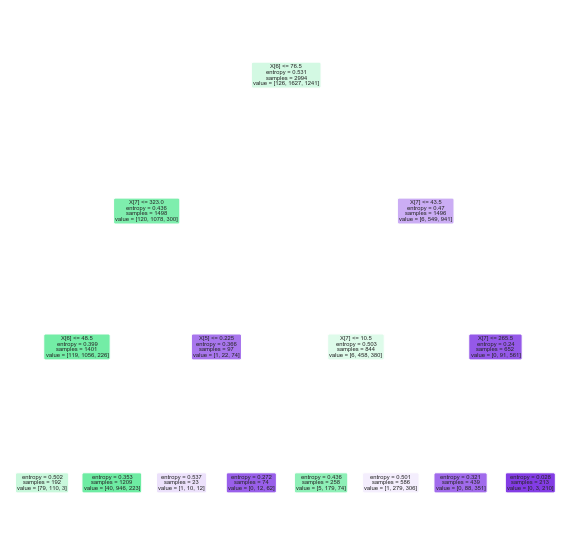

In [96]:
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dt2, filled=True, rounded=True)

Confusion Matrix

[[  0  52   4]
 [  0 521 181]
 [  0 153 373]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        56
           2       0.72      0.74      0.73       702
           3       0.67      0.71      0.69       526

    accuracy                           0.70      1284
   macro avg       0.46      0.48      0.47      1284
weighted avg       0.67      0.70      0.68      1284

Confusion Matrix, without normalization
[[  0  52   4]
 [  0 521 181]
 [  0 153 373]]


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



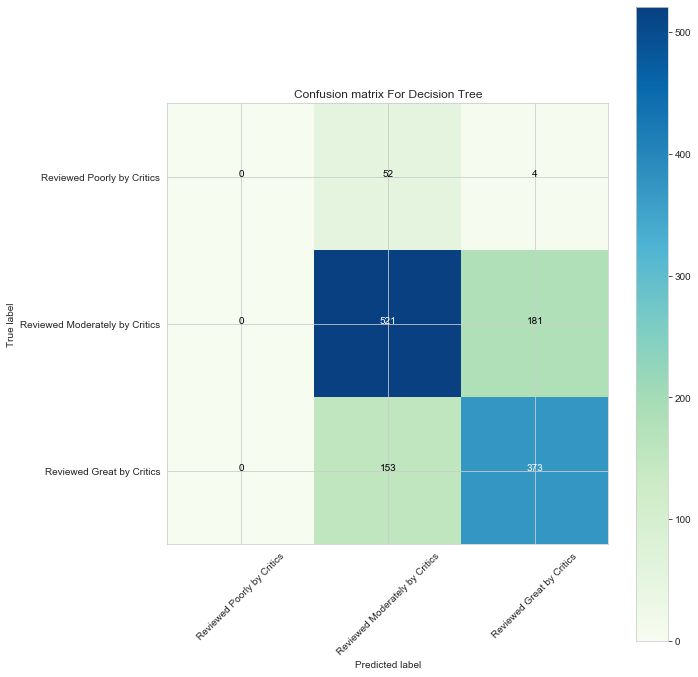

In [97]:
print(confusion_matrix(y2_test, y2_pred_dt))
print(classification_report(y2_test, y2_pred_dt))

cm5 = confusion_matrix(y2_test,y2_pred_dt)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm5, classes,
                          normalize=False,
                          title='Confusion matrix For Decision Tree',
                          cmap=plt.cm.GnBu,)

In [98]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_dt[0:25])
print(f'Decision Tree Classifier Accurary from 1st 25 values is {(15/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [2 2 3 3 2 3 3 2 3 2 2 2 2 3 2 2 2 3 3 2 3 2 2 3 2]
Decision Tree Classifier Accurary from 1st 25 values is 60.0%


### Bernoulli NB Classifier

In [99]:
# Bernoulli NB Classifier

clf2= BernoulliNB()
clf2.fit(X2_train,y2_train)
y2_pred_clf = clf2.predict(X2_test)
y_predict_proba_clf2 = clf2.predict_proba( X2_test)

clf_accuracy_train2 = clf2.score(X2_train ,y2_train)
clf_accuracy_test2 = clf2.score(X2_test,y2_test)

print(f'Bernoulli NB train accuracy is {clf_accuracy_train2}\n Bernoulli NB test accuracy is {clf_accuracy_test2}')


clf2_evalution = run_model('BernoulliNB', clf2,X2,y2,y2_test,y2_pred_clf)
print_model('BernoulliNB', clf2,X2,y2,y2_test,y2_pred_clf)


Bernoulli NB train accuracy is 0.6576486305945224
 Bernoulli NB test accuracy is 0.6300623052959502
BernoulliNB Prediction accuracy is: 0.6300623052959502
 BernoulliNB Mean cross validation is: 0.625071504006459
  BernoulliNB Precision score is: 0.617462839627618
   BernoulliNB Prediction recall score is: 0.6300623052959502
    BernoulliNB Prediction f1 score is: 0.6183972829432771


Confusion Matrix

[[  4  41  11]
 [  6 514 182]
 [  2 233 291]]
              precision    recall  f1-score   support

           1       0.33      0.07      0.12        56
           2       0.65      0.73      0.69       702
           3       0.60      0.55      0.58       526

    accuracy                           0.63      1284
   macro avg       0.53      0.45      0.46      1284
weighted avg       0.62      0.63      0.62      1284

Confusion Matrix, without normalization
[[  4  41  11]
 [  6 514 182]
 [  2 233 291]]


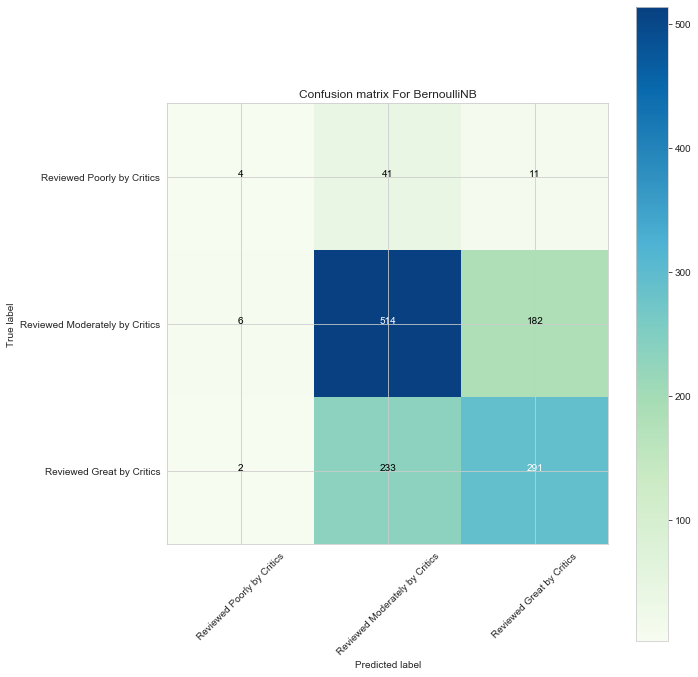

In [100]:
print(confusion_matrix(y2_test, y2_pred_clf))
print(classification_report(y2_test, y2_pred_clf))

cm6 = confusion_matrix(y2_test,y2_pred_clf)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm6, classes,
                          normalize=False,
                          title='Confusion matrix For BernoulliNB',
                          cmap=plt.cm.GnBu,)

In [101]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_clf[0:25])
print(f'Bernoulli NB Classifier Accurary from 1st 25 values is {(15/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [3 2 2 2 2 2 2 3 2 3 2 2 3 3 2 2 2 3 2 3 3 2 2 3 3]
Bernoulli NB Classifier Accurary from 1st 25 values is 60.0%


In [102]:
#Table with results of all the models I ran across all scores
all_evaluations_table = pd.DataFrame()

all_evaluations_table = all_evaluations_table.append([dummy_c_evalution, knn3_evalution, logreg_evalution, rf_evalution, svc_evalution, bt2_evalution, dt2_evalution, clf2_evalution])
all_evaluations_table.columns = ['Model', 'Accuracy Score','Cross Validation Accuracy Score' ,'Precision Score', 'Recall Score', 'F1 Score']

all_evaluations_table

,Model,Accuracy Score,Cross Validation Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline,0.489097,0.456998,0.490652,0.489097,0.489812
1,K_nearest Neighbor = 3,0.825545,0.691461,0.823435,0.825545,0.823486
2,Logistic Regression,0.708723,0.725801,0.720468,0.708723,0.695461
3,Random Forest,0.721963,0.725347,0.723327,0.721963,0.710929
4,Support Vector Classification,0.714953,0.730492,0.713981,0.714953,0.704959
5,Bagging Trees,0.712617,0.733298,0.711598,0.712617,0.704639
6,Decision Tree,0.696262,0.710855,0.666189,0.696262,0.680867
7,BernoulliNB,0.630062,0.625072,0.617463,0.630062,0.618397


## Classification for Global Sales

In [ ]:


X = data_dummy_sales_clas.drop(['Sold_Classification'
                                ,'Name'
                                ,'3DO'
                                , 'ASCII Entertainment'
                                , 'Acquire'
                                , 'Atlus'
                                , 'Deep Silver'
                                , 'Eidos Interactive'
                                , 'Encore'
                                , 'Enix Corporation'
                                , 'From Software'
                                , 'GT Interactive'
                                , 'Game Factory'
                                , 'Global Star'
                                , 'Hudson Soft'
                                , 'Level 5'
                                , 'Myelin Media'
                                , 'Namco Bandai Games'
                                , 'NewKidCo'
                                , 'Nintendo'
                                , 'Pacific Century Cyber Works'
                                , 'Pinnacle'
                                , 'SCi'
                                , 'Square'
                                , 'Strategy'
                                , 'System 3 Arcade Software'
                                , 'TDK Mediactive'
                                , ' Inc'
                                , 'AQ Interactive'
                                , 'Activision'
                                , 'Agatsuma Entertainment'
                                , 'Bigben Interactive'
                                , 'ESP'
                                , 'Focus Home Interactive'
                                , 'Funbox Media'
                                , 'Funcom'
                                , 'Ghostlight'
                                , 'GungHo'
                                , 'Gust'
                                , 'Human Entertainment'
                                , 'Kadokawa Shoten'
                                , 'Mercury Games'
                                , 'Paradox Interactive'
                                , 'Play It'
                                , 'Popcorn Arcade'
                                , 'RTL'
                                , 'Scholastic Inc.'
                                , 'Sony Computer Entertainment'
                                , 'Swing! Entertainment'
                                , 'Titus'
                                , 'Virgin Interactive'
                                , 'Visco'], axis = 1)
y = data_dummy_sales_clas['Sold_Classification']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)

print(f'{X.shape},\n {y.shape} ')

In [ ]:
for feature in sorted(zip(rf.feature_importances_, list(X_train.columns))):
    print(feature)

### Logistic Regression Model

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

logreg_accuracy_train = logreg.score(X_train ,y_train)
logreg_accuracy_test = logreg.score(X_test,y_test)

# Cross Validation - Logistic Regression

logreg_cross_val_score = cross_val_score(logreg, X,y, cv=10)
logreg_cv_score_avg = logreg_cross_val_score.mean()
cv_pred_logreg = cross_val_predict(logreg, X_test, y_test, cv=10)

print(f'Logistic Regression train accuracy is {logreg_accuracy_train}\nLogistic Regression test accuracy is {logreg_accuracy_test}\nMean Cross Validation logreg Regression is: {logreg_cv_score_avg}')
logreg_evalution = run_model('Logistic Regression', logreg,X,y,y_test,y_pred_logreg)
print_model('Logistic Regression', logreg,X,y,y_test,y_pred_logreg)

### KNN Model - Best Preformming Model 

In [ ]:
# K_nearest Neighbor = 5
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_test, y_test)
y_pred_knn5 = knn5.predict(X_test)


# K_nearest Neighbor = 3 
knn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_test, y_test)
y_pred_knn3 = knn3.predict(X_test)


# Testing Accuracy
knn5_accuracy_train = knn5.score(X_train,y_train)
knn5_accuracy_test = knn5.score(X_test,y_test)

knn3_accuracy_train = knn3.score(X_train,y_train)
knn3_accuracy_test = knn3.score(X_test,y_test)

# Printing Accuracy
print(f'K_nearest Neighbor = 5 Regression train accuracy is {knn5_accuracy_train}\nK_nearest Neighbor = 5 Regression test accuracy is {knn5_accuracy_test}')
knn5_evalution = run_model('K_nearest Neighbor = 5', knn5,X,y,y_test,y_pred_knn5)
print_model("K_nearest Neighbor = 5", knn5,X,y,y_test,y_pred_knn5)


print(f'\n\nK_nearest Neighbor = 3 Regression train accuracy is {knn3_accuracy_train}\nK_nearest Neighbor = 3 Regression test accuracy is {knn3_accuracy_test2}')
knn3_evalution = run_model('K_nearest Neighbor = 3', knn3,X2,y2,y2_test,y2_pred_knn3)
print_model("K_nearest Neighbor = 3", knn3,X,y,y_test,y_pred_knn3)



y_predict_proba_knn5 = knn5.predict_proba(X_test)

Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred_knn5))
print(classification_report(y_test, y_pred_knn5))


cm = confusion_matrix(y_test,y_pred_knn5)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix For KNN',
                          cmap=plt.cm.GnBu)

In [ ]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred_knn3[0:25])
print(f'Accurary from 1st 25 values is {(22/25)*100}%')

### Support Vector Classification

In [ ]:
# Support Vector Classification
svc = svm.SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)
y_pred_svc = svc.predict(X_test)

svc_accuracy_train = svc.score(X_train,y_train)
svc_accuracy_test = svc.score(X_test,y_test)


print(f'Support Vector Classification train accuracy is {svc_accuracy_train}\nSupport Vector Classification test accuracy is {svc_accuracy_test}')

svc_evalution = run_model('Support Vector Classification', svc,X,y,y_test,y_pred_svc)
print_model("Support Vector Classification", svc,X,y,y_test,y_pred_svc)

Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

cm4 = confusion_matrix(y_test,y_pred_svc)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm4, classes,
                          normalize=False,
                          title='Confusion matrix For Support Vector Classification',
                          cmap=plt.cm.GnBu)

In [ ]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred_svc[0:25])
print(f'Support Vector Classification Accurary from 1st 25 values is {(20/25)*100}%')